In [1]:
# Problem statement : 
# An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

# The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

#There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

#X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#Goals of the Case Study
#Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely 
# to convert whereas a lower score would mean that the lead is cold and will mostly not get converted . 

#STEPS THAT WE FOLLOW IN THIS ASSIGNMENT:

# STEP 1 : DATA READING
# STEP 2 : DATA CLEANING BY CHECKING THE NULL VALUES OR REMOVING DUPLICATES
# STEP 3 : DATA VISUALISATION
# STEP 4 : DATA ANALYSIS - NUMERICAL AND CATEGORICAL VARIABLES TREATMENT
# STEP 5 : TRAIN TEST SPLIT AND RELATED WORKINGS
# STEP 6 : MODEL BUILDING USING RFE AND PCA ANALYSIS
# STEP 7 : RUNNING THE MODEL ON TESTED DATA
# STEP 8 : EVALUATION OF THE MODEL - CHECKING THE PREDICTED VALUES ON TRAINED SET
# STEP 9 : EVALUATION OF THE MDOEL USING CONFUSION MATRIX AND ROC
# STEP 10 : CONCLUSIONS AND RECOMMENDATIONS




In [2]:
# first lets import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler



### STEP 1 : DATA READING

In [3]:
#Lets import the data 

lead_study=pd.read_csv('Leads.csv')
lead_study.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_study.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
#Analysing the numerical data
lead_study.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
lead_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### STEP2: Data Cleaning :

In [7]:
#Now lets check for the duplicates in the data frame :

sum(lead_study.duplicated(subset='Prospect ID'))==0


True

In [8]:
sum(lead_study.duplicated(subset='Lead Number'))==0

True

In [9]:
# Inference : clearly we cannot find any duplicate values in the primary keys , prospect id , lead number and thus we can find that these 
# two fields reprsent the same information . We will go ahead and drop prospect ID from the dataset
# dropping lead number and prospect id as they both represent the same unique values :

lead_study.drop(['Prospect ID'],1,inplace=True)

In [10]:
#converting the select values to NAN : 
lead_study=lead_study.replace('Select',np.nan)
# Inference : as you can see the select option in most of the columns seems to be like chosing the nan values as people had not selcted 
# that particluar option while visiting the website /while contacted .Hence in order to avoid confusion we shall put all selects as NAN , in common.

In [11]:
#[lead_study[x].value_counts() for x in lead_study.columns]

In [12]:
# checking the percentage of null values across the dataframe :
round(100*(lead_study.isnull().sum()/len(lead_study.index)),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

In [13]:
#Inference : as you can see that the number of columns that have no null values are more compared to those columns that have null vaues 
# it seems that the data is complete to certain extent . However we could find that there are some columns that have more null values , so lets take a percentage of approximately 45% of missing values as cut off and drop such columns 

In [14]:
# dropping columns with more than 45% of the null values :
cols=lead_study.columns 

for i in cols:
    if((100*(lead_study[i].isnull().sum()/len(lead_study.index)))>=50):
        lead_study.drop(i,1,inplace=True)

In [15]:
lead_study.shape

(9240, 33)

In [16]:
# now lets  check the percentage of null values :
round(100*(lead_study.isnull().sum()/len(lead_study.index)),2).sort_values(ascending=False)

Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Lead Origi

Inference : Now we can see that the percentage of null values is to a considerable extent now.

### STEP 3 : DATA VISUALISATION & EDA:

In [17]:
# Lets check the count of values for country column 

lead_study['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Canada                     4
Kuwait                     4
South Africa               4
Germany                    4
Sweden                     3
China                      2
Philippines                2
Ghana                      2
Asia/Pacific Region        2
Uganda                     2
Italy                      2
Belgium                    2
Netherlands                2
Bangladesh                 2
Denmark                    1
Switzerland                1
Liberia                    1
Russia                     1
Sri Lanka                  1
Kenya         

In [18]:
#inference : as you can see that most of the leads /enquiries are from India , followed by UAE & Singapore . It is also seen that 
# most of the candidates did not update the conutry column. Now lets see how the same looks like when plotting on a bar chart 

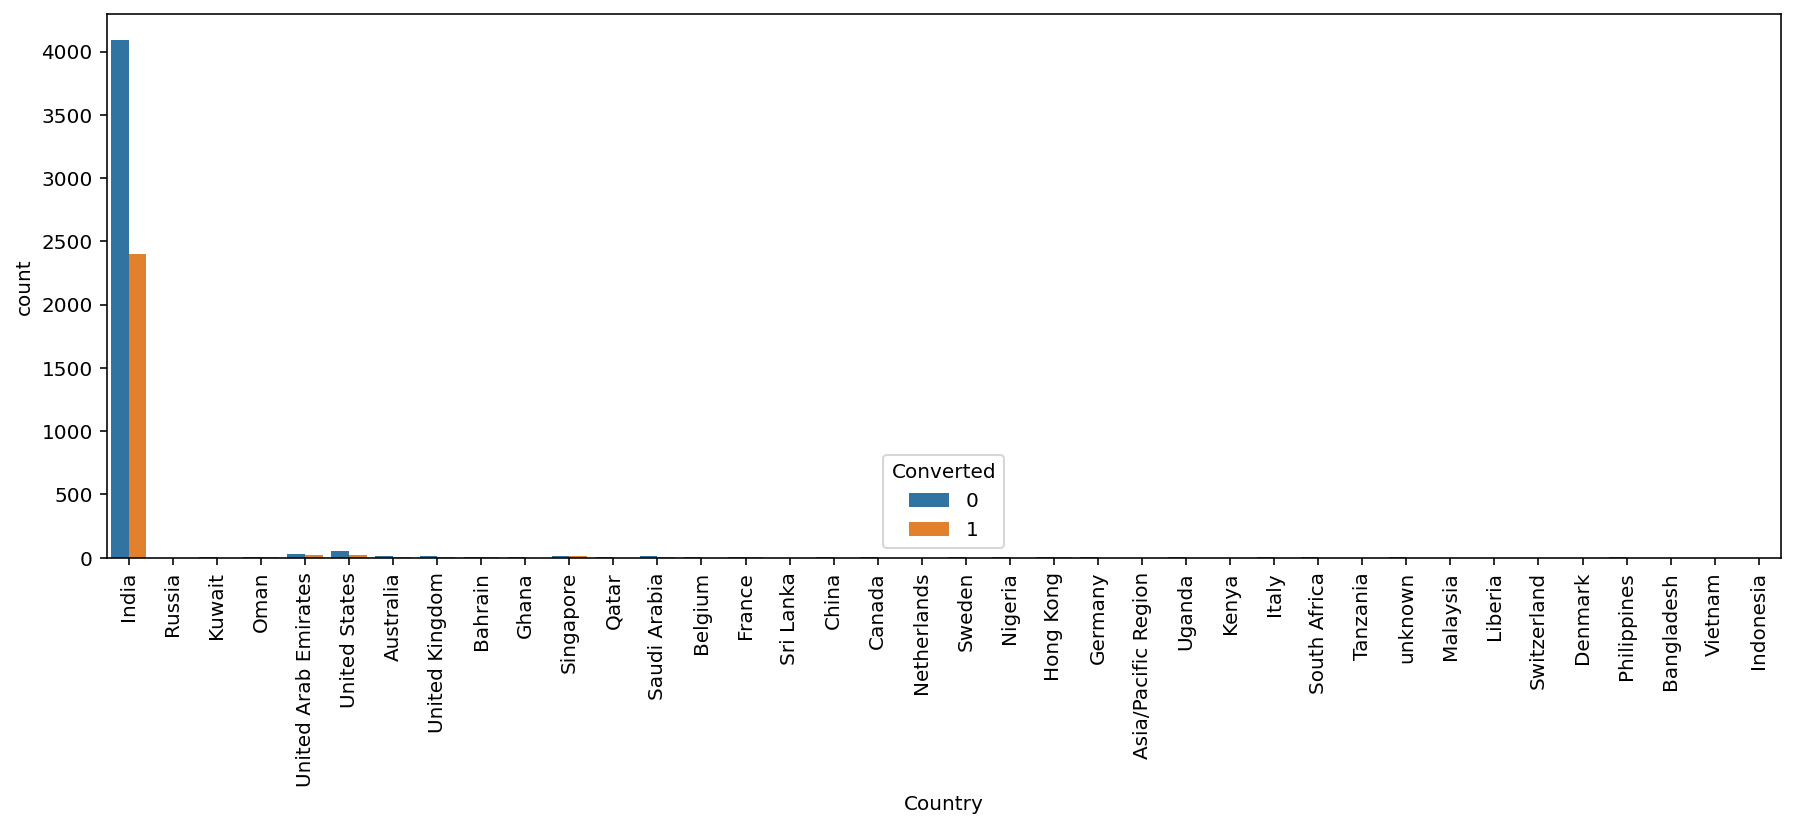

In [19]:
# plotting the country column :

plt.figure(figsize=(15,5))
c=sns.countplot(lead_study.Country,hue=lead_study.Converted)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
plt.show()

In [20]:
# inference : as you can see out of the total enquiries made for any particular course made to the institution , most of them are from 
#india and within India , we can see out of 6492 cases , leads that got converted are 2400 and the balance of 4092 are not.

In [21]:
#Now lets try to replace the Nan values in this column to India as we can see that most of the enquiries are from this country and the 
# prospects also can be improved from this country :
lead_study['Country']=lead_study['Country'].replace(np.nan,lead_study['Country'].mode()[0])

In [22]:
#Lets see how the data looks like post the above change :
lead_study.Country.value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Nigeria                    4
Germany                    4
South Africa               4
Canada                     4
Sweden                     3
Ghana                      2
Asia/Pacific Region        2
Philippines                2
Belgium                    2
Italy                      2
Netherlands                2
Bangladesh                 2
Uganda                     2
China                      2
Tanzania                   1
Denmark                    1
Liberia                    1
Switzerland                1
Vietnam                    1
Malaysia                   1
Indonesia     

The Data is pretty skewed when we impute data in the country column with the mode and it will make sense to drop this column.

In [23]:
#Creating a list with the list of columns to be dropped.
cols_to_drop=['Country']

In [24]:
#First lets take the city column and check the count of numbers for this column :

lead_study['City'].value_counts(dropna=False)/len(lead_study.index)*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [25]:
#Inference :Again we can see that the nan values are very high with respect to the city column , followed by mumbai . so we can 
#replace the nan values to mumbai .
lead_study['City']=lead_study['City'].replace(np.nan,lead_study['City'].mode()[0])

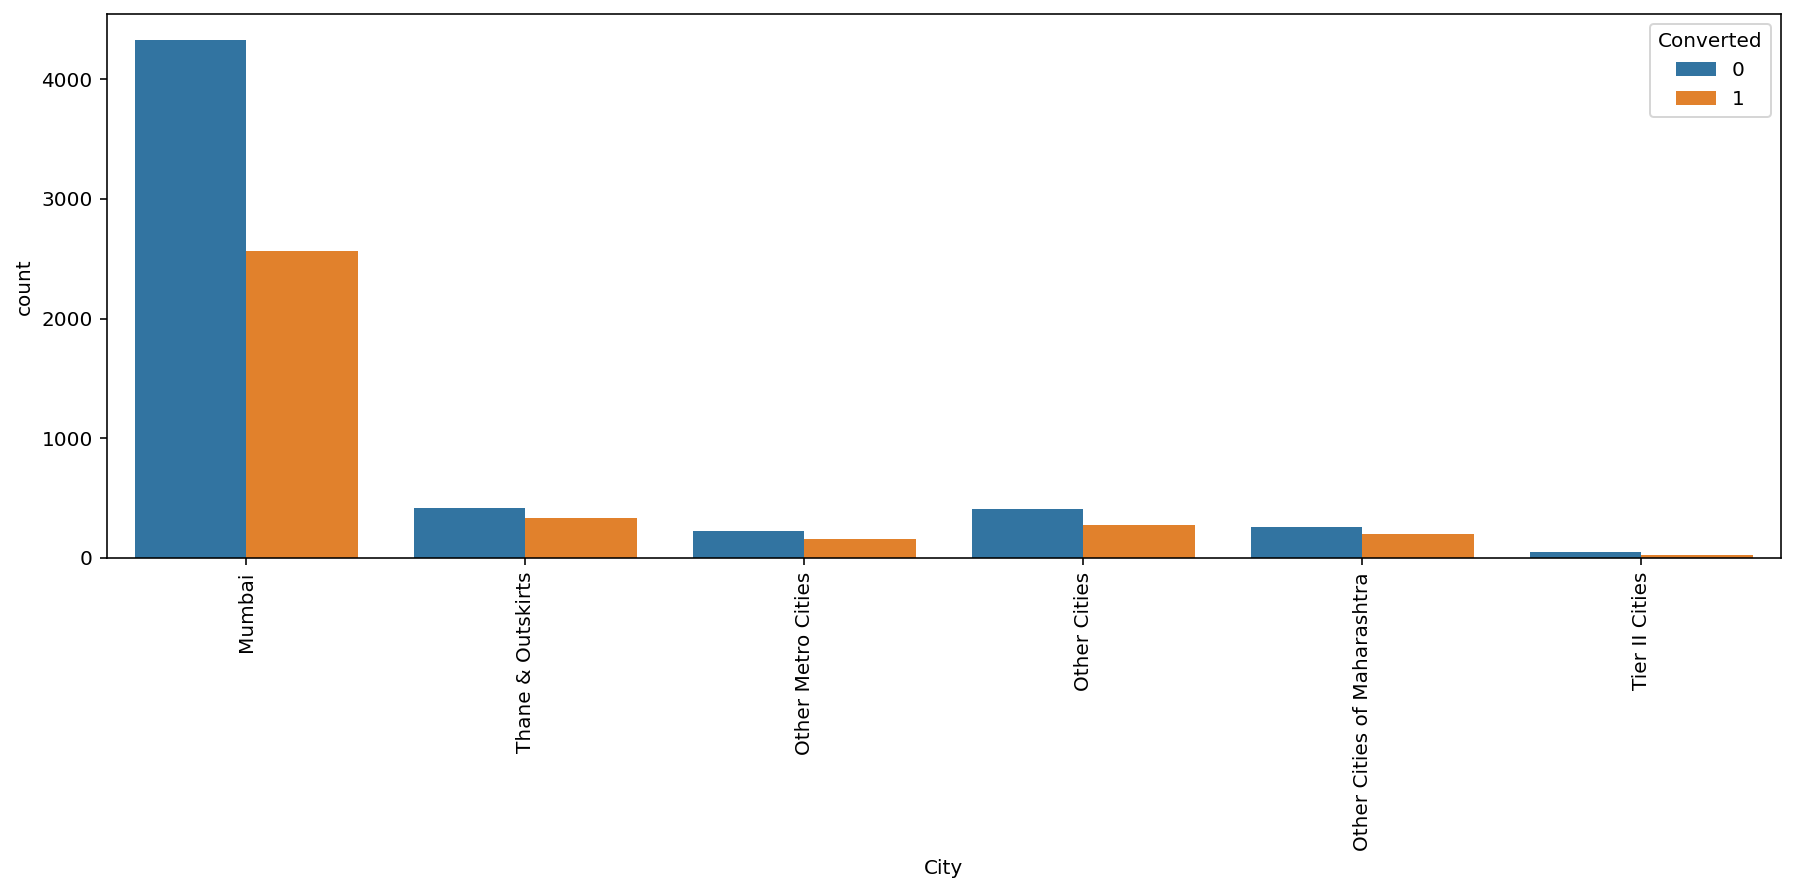

In [26]:
plt.figure(figsize=(15,5))
c=sns.countplot(lead_study.City,hue=lead_study.Converted)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
plt.show()

In [27]:
#inference : As we can see that out of the total cases in city , we can see that Mumbai has the chance of maximum conversion of around
#4200 , followed by Thane  and outskirts category . we can take this into our account for further analysis .

In [28]:
#The next area that we can look into for our data visualisation and analysis is the specialisation column . in this field we can find 
# many people visiting our centre (by enquiring through website or other form) and therby focus our attention towards such areas .

# lets first see the count of this column :
lead_study['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [29]:
#inference :We can see that the count of cases where the specialisation is Nan is around 3380 which accounts to nearly 36% of the total
# count followed by Finance management to around 12% . 
# we can infer that this value of Nan in this field is due to the fact that the concerened candidates may have forgotten to update the same . Now in this case we cannot replace the nan to Finance management as it would result in huge error so we just mention as not specified :

lead_study['Specialization']=lead_study['Specialization'].replace(np.nan,'Not Specified')



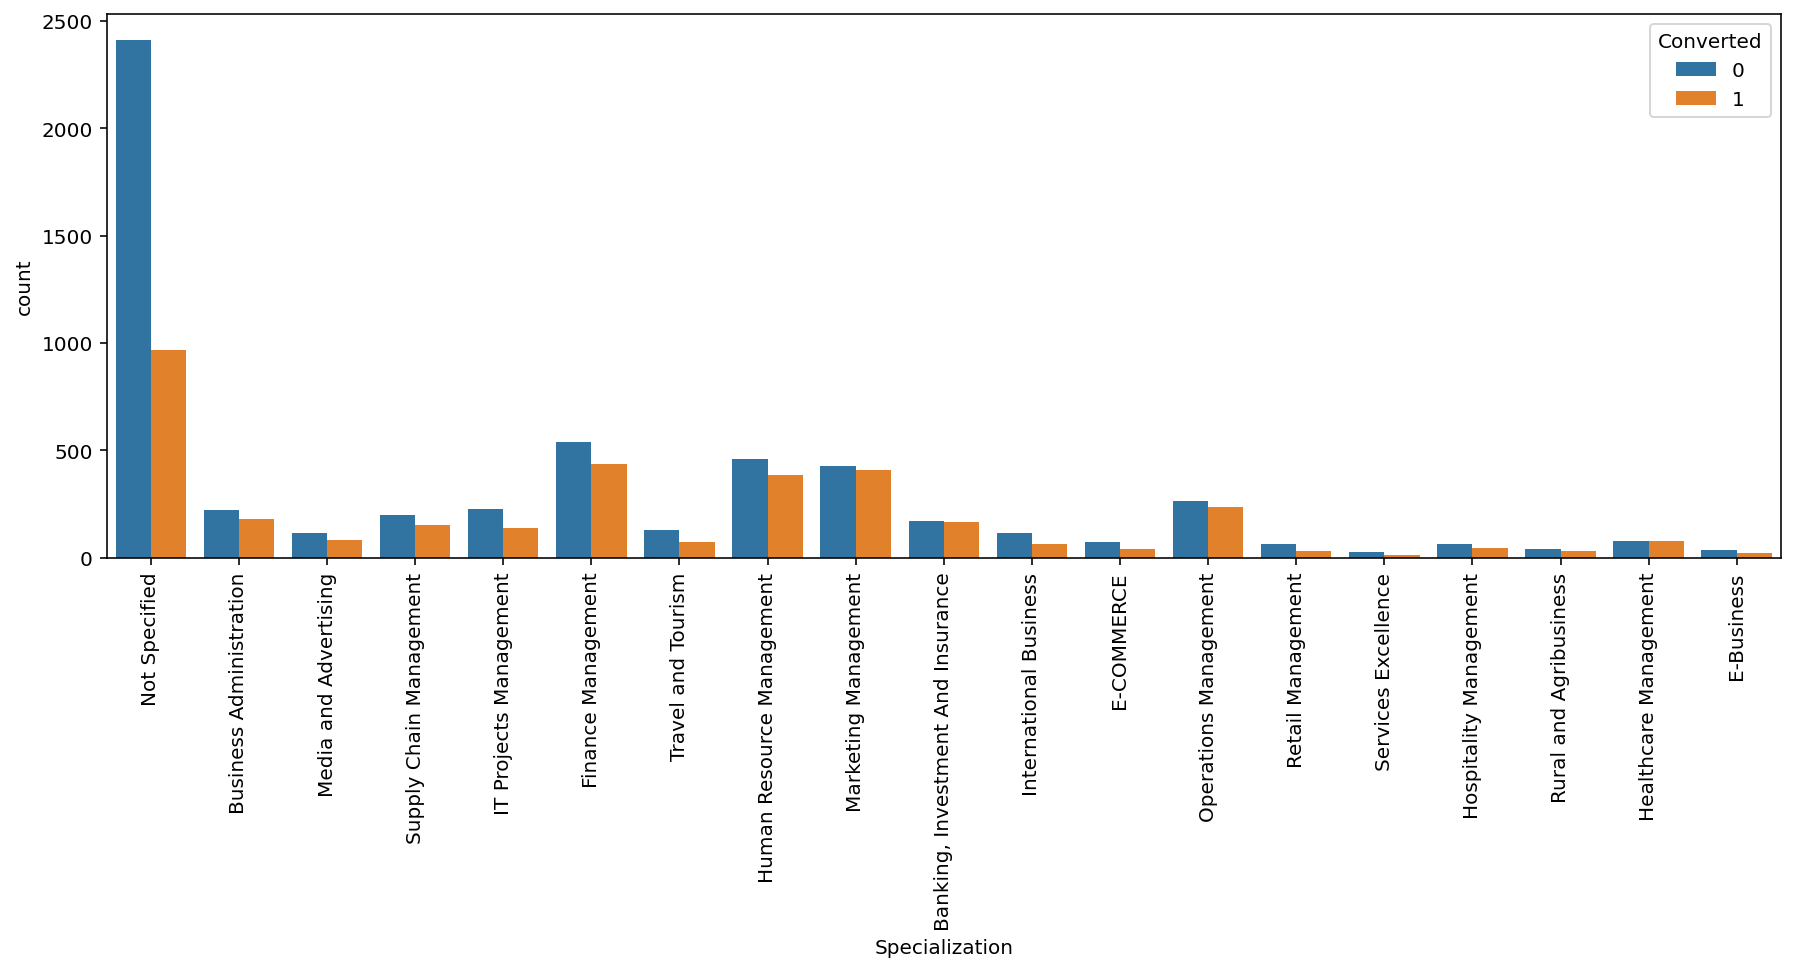

In [30]:
#plotting the spread of Specilization column : 

plt.figure(figsize=(15,5))
c=sns.countplot(lead_study.Specialization,hue=lead_study.Converted)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
plt.show()

In [31]:
#inference : we can see that though the number of people who has not specified any specialisation also has the converted numbers as high 
#we cannot drop them just like that and may be we can try to add more specialisations / request the concerned candidates to update the column when 
#they work on the data . The next area that the leads are getting converted or chances of conversion is Business administration 

In [32]:
#Inference : also you can note that the fields related to management can be clubbed together as it gets repeated and all comes under one 
# filed of management as specialisation , This is done to reduce the number of columns that have the same nature .

In [33]:
# combining the managemnet specialisations together ;
lead_study['Specialization']=lead_study['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'],'Management_Specialiations')

In [34]:
lead_study.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [35]:
lead_study['Specialization'].value_counts()

Management_Specialiations            4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

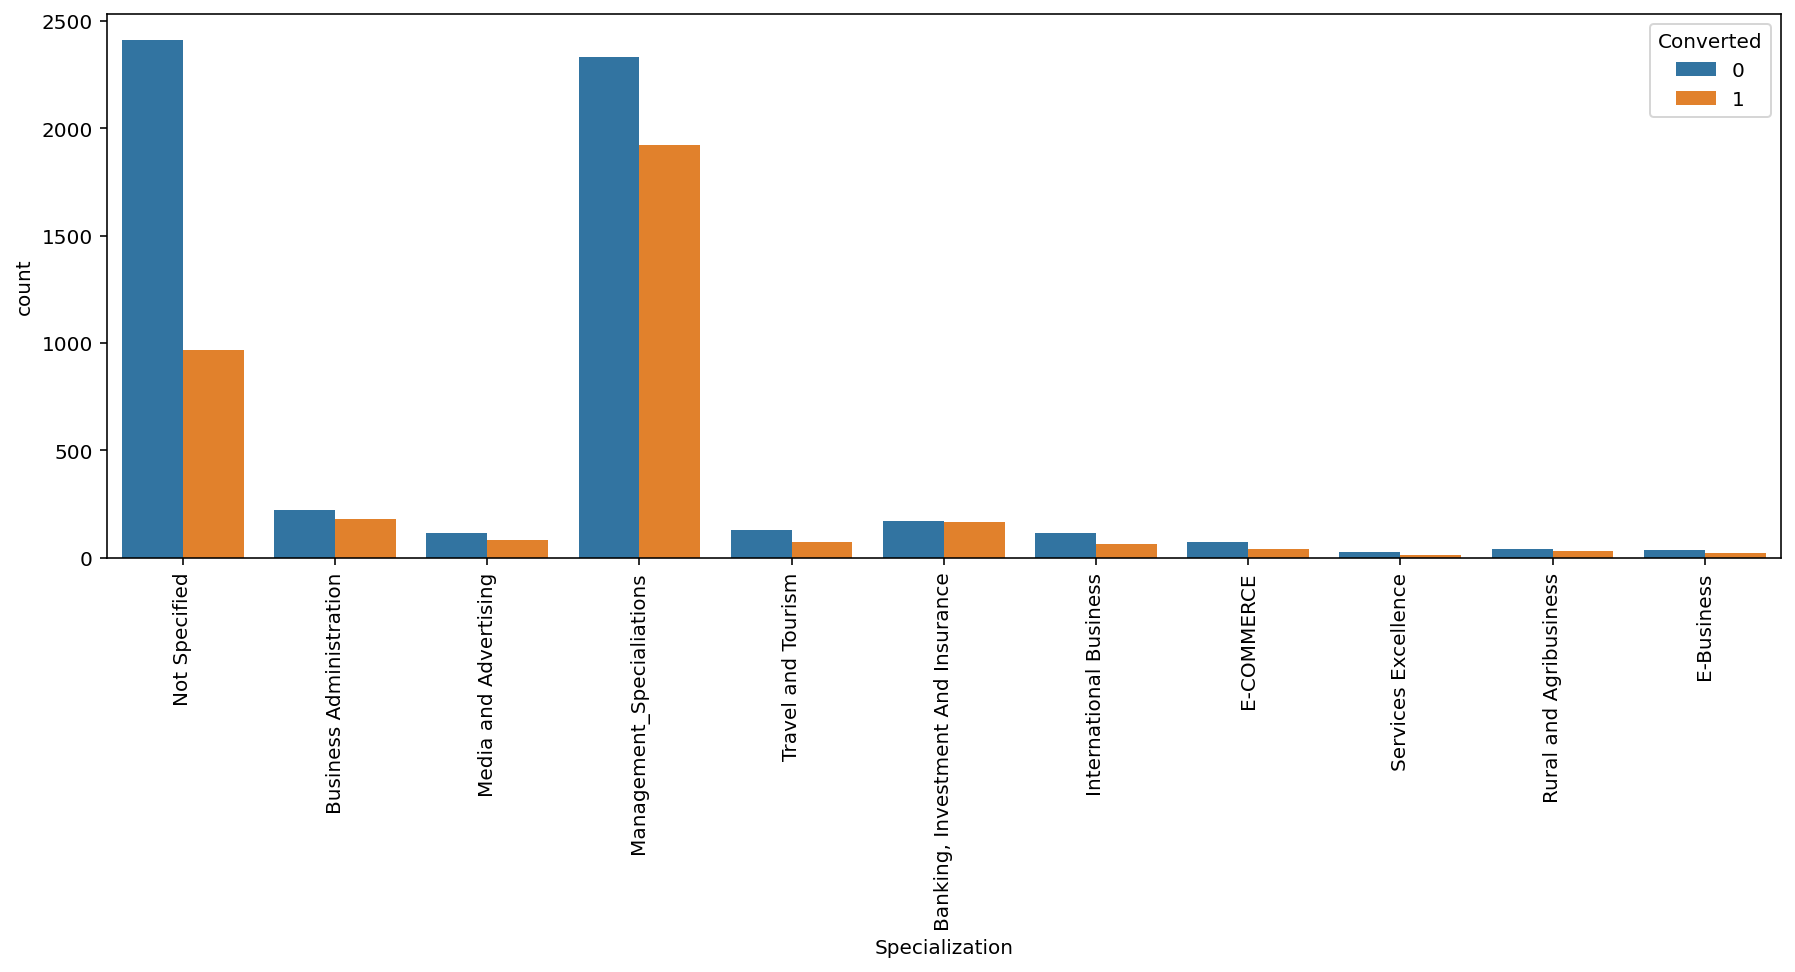

In [36]:
#Like before lets visualise the count of specialisation :
plt.figure(figsize=(15,5))
c=sns.countplot(lead_study.Specialization,hue=lead_study.Converted)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
plt.show()

In [37]:
#inference : As you can see that out of the total specialisations , those that are enquired more and those that gets converted into leads
# more are those that belong to management specialisations . Though there are cases where the specialisaton is not specified , we can see that the number 
# that gets converted to leads in such cases is less when compared to the management specialisations case.

In [38]:
#Lead Origin Column has clean data and no modification is required.
lead_study['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [39]:
#another variable to consider is the "what is your occupation" variable as you can see from the original dataframe as the number of
# line items that it contains is around 6590 , contributing to 28% of the data . Also this seems to be an important variable as the 
#chance of lead getting converted or not and the choice of course selection /institute selection also depends on this factor .

In [40]:
lead_study['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [41]:
lead_study['What is your current occupation'].mode()[0]

'Unemployed'

In [42]:
#imputing the Nan values with mode "unemployed"

lead_study['What is your current occupation']=lead_study['What is your current occupation'].replace(np.nan,lead_study['What is your current occupation'].mode()[0])

In [43]:
#Now checking :
lead_study['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

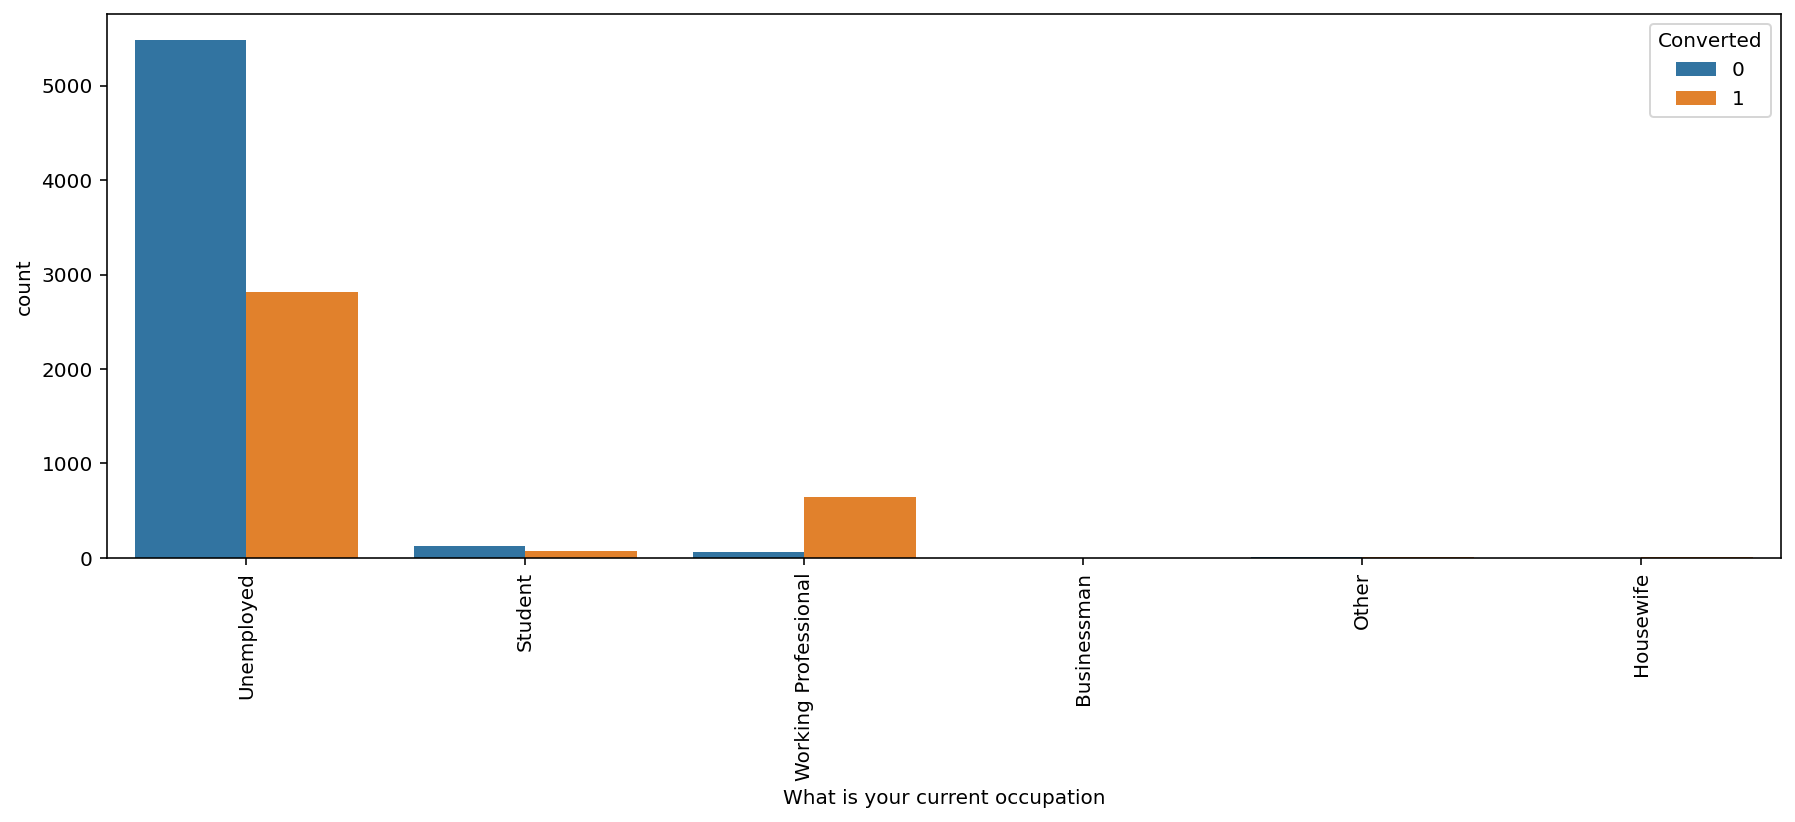

In [44]:
# visualising the count :
plt.figure(figsize=(15,5))
c=sns.countplot(lead_study['What is your current occupation'],hue=lead_study.Converted)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
plt.show()

In [45]:
# Inference :We can see that in terms of number of enquiries there are lot of people that are leds in the unemployment category 
# on the other hand the number of people that gets converted to leads is more in the case of working professionals and hence more chances 
# of joining the courses .

In [46]:
# value counts :
lead_study['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [47]:
# Inference : this is the next most important variable to consider . as you can see that better career prospects is what most people 
# look into when chosing a course :
#Replacing the Nan values with better career prospects :

lead_study['What matters most to you in choosing a course']=lead_study['What matters most to you in choosing a course'].replace(np.nan,'Not Specified')

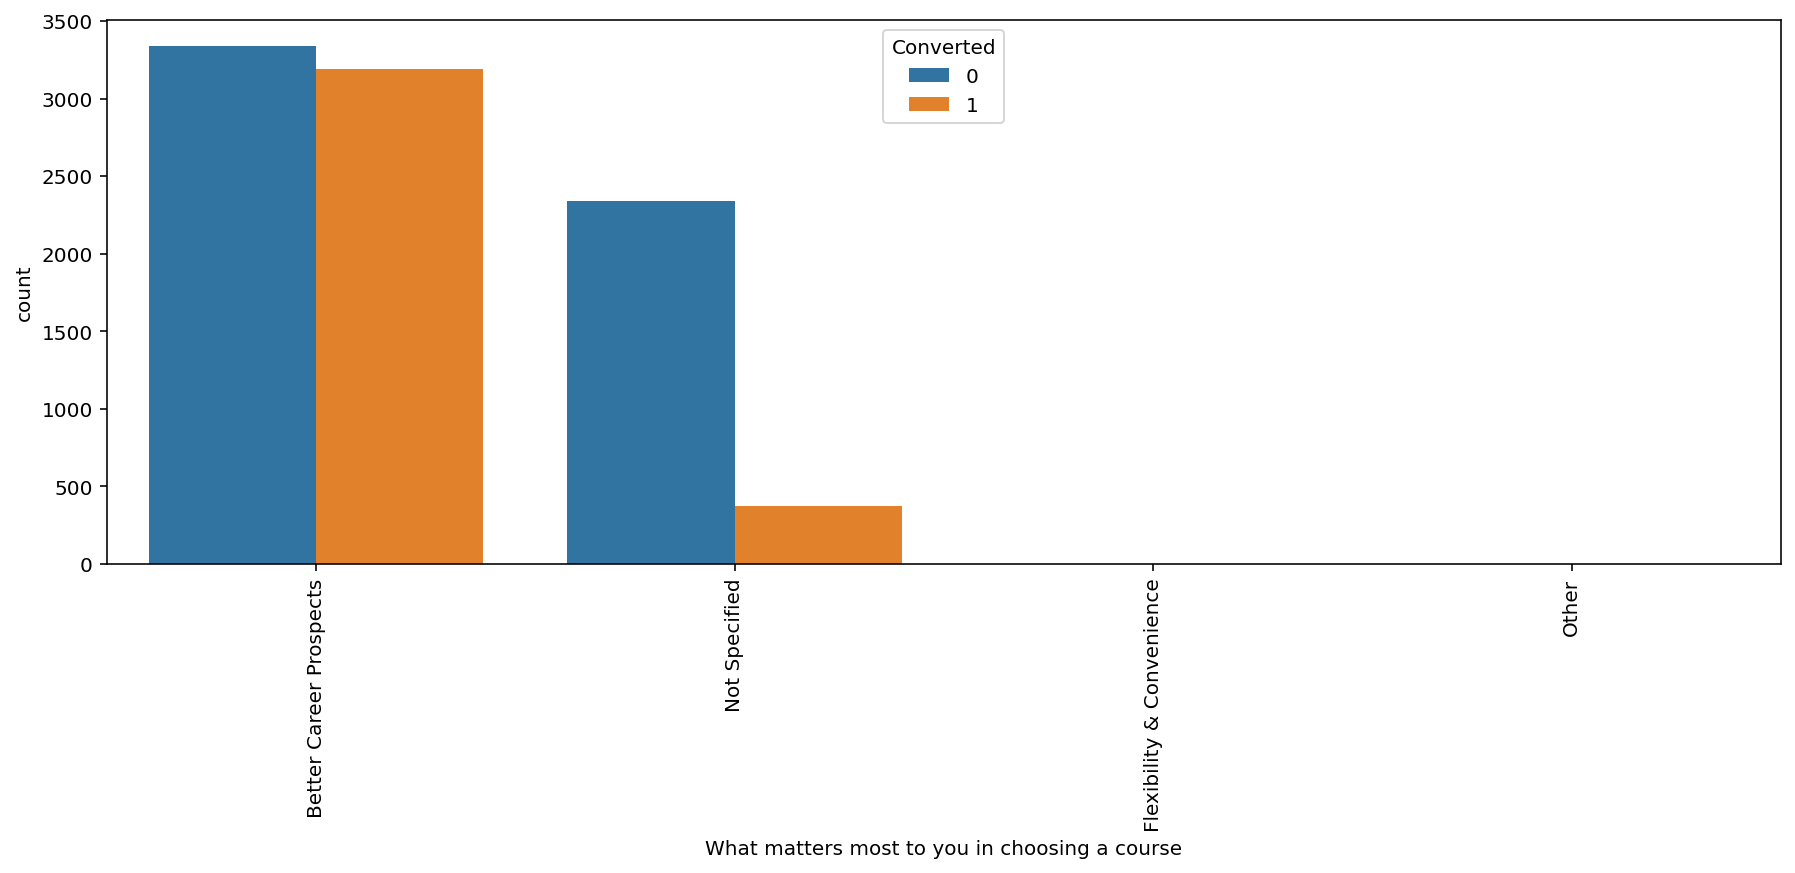

In [48]:
plt.figure(figsize=(15,5))
c=sns.countplot(lead_study['What matters most to you in choosing a course'],hue=lead_study.Converted)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
plt.show()

In [49]:
lead_study['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
Not Specified                2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [50]:
round(100*(lead_study.isnull().sum()/len(lead_study.index)),2).sort_values(ascending=False)

Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
Total Time Spent on Website                       0.00
Specialization                                    0.00
Country                                           0.00
Do Not Call                                       0.00
Converted                                         0.00
What matters most to you in choosing a course     0.00
Do Not Email                                      0.00
Lead Origin                                       0.00
What is yo

In [51]:
#Next variable :

lead_study['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
welearnblog_Home        1
youtubechannel          1
WeLearn                 1
NC_EDM                  1
testone                 1
blog                    1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [52]:
# Lets replace the Nan Values and combining low frequency values This is done in order to reduce too many variables under a common head
#lead_study['Lead Source']=lead_study['Lead Source'].replace(np.nan ,'Other sources')
lead_study['Lead Source']=lead_study['Lead Source'].replace('google','Google')
lead_study['Lead Source']=lead_study['Lead Source'].replace('Facebook','Social Media')
lead_study['Lead Source']=lead_study['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home',
                                                            'WeLearn','blog','Pay per Click Ads','testone','NC_EDM'],'Other sources')




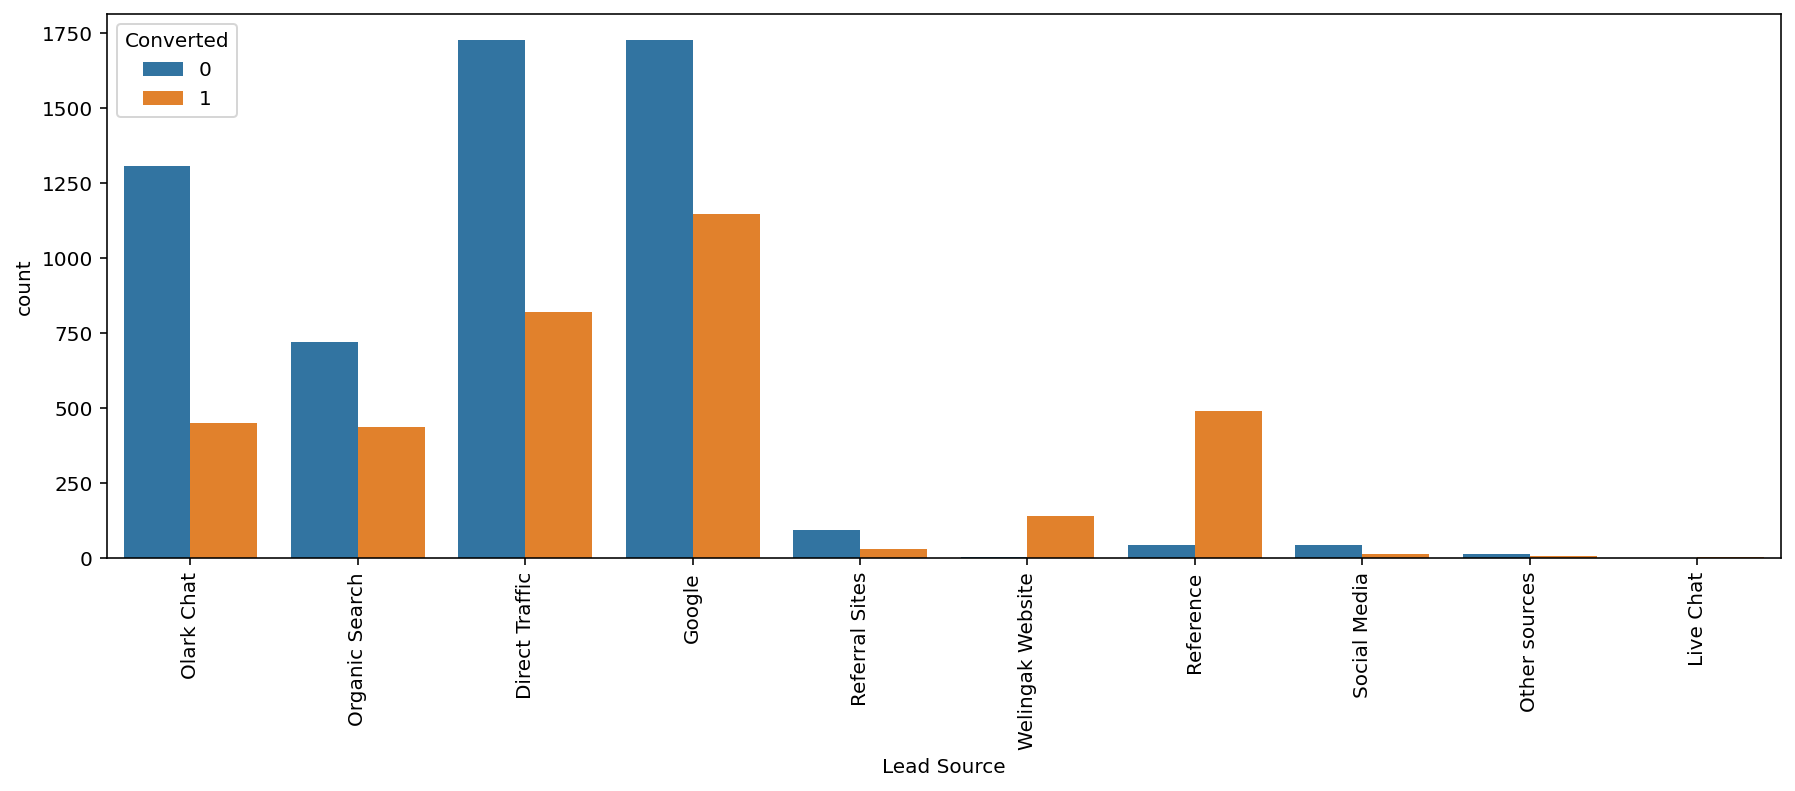

In [53]:
#Lets now visualise the data related to Lead source now :
plt.figure(figsize=(15,5))
c=sns.countplot(lead_study['Lead Source'],hue=lead_study.Converted)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
plt.show()

In [54]:
#inference : from the above we can see that the lead source is more from the sources related to Direct Traffic/enquiry and 
# that from Google search engine .
#Also the next conversion rate from references and wellingkak website is more 
# on the other hand, we need to focus our efforts on improving the conversion rate from Olark Chat , organic search . However though 
# social media ,live chats and other sources of leads do not contribute much we can direct our focus on the remaining sources to convert them into leads 
# as these are the areas that people look into , and hence chances of converting into leads is better than other sources.
#Here we take the focus on those known areas to improve more than on unknown areas 

In [55]:
#Last Activity column check :
lead_study['Last Activity'].value_counts(dropna=False)


Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [56]:
#Now lets do the next step of replacing the nan values and those with less number columns :
lead_study['Last Activity']=lead_study['Last Activity'].replace(np.nan,'Others')
lead_study['Last Activity']=lead_study['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Others')

In [57]:
lead_study['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [58]:
#Checking null values percentage across the columns now :
round(100*(lead_study.isnull().sum()/len(lead_study.index)),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [59]:

lead_study['Asymmetrique Activity Index']=lead_study['Asymmetrique Activity Index'].replace(np.nan,"Not Specified")
lead_study['Asymmetrique Activity Index'].value_counts(dropna=False)

Not Specified    4218
02.Medium        3839
01.High           821
03.Low            362
Name: Asymmetrique Activity Index, dtype: int64

In [60]:

lead_study['Asymmetrique Profile Index']=lead_study['Asymmetrique Profile Index'].replace(np.nan,"Not Specified")
lead_study['Asymmetrique Profile Index'].value_counts(dropna=False)

Not Specified    4218
02.Medium        2788
01.High          2203
03.Low             31
Name: Asymmetrique Profile Index, dtype: int64

In [61]:
#next column that we look into is the "Lead origin".lest follow the same steps like the above columns :

lead_study['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

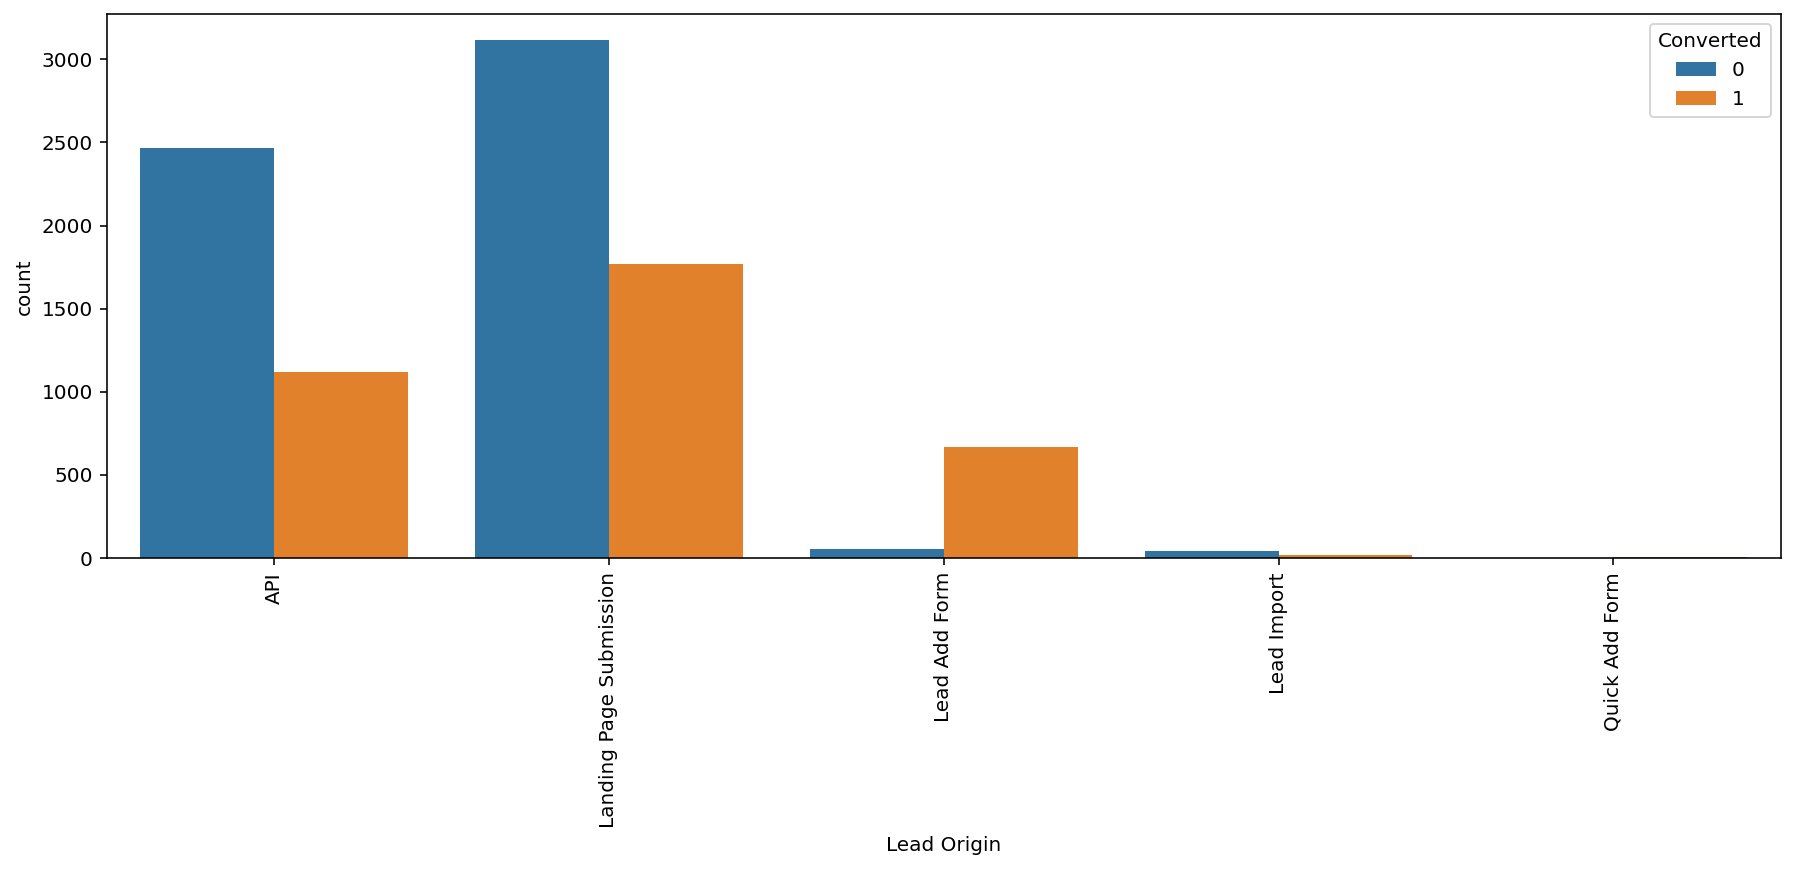

In [62]:
#Now plotting them on the graph :
plt.figure(figsize=(15,5))
c=sns.countplot(lead_study['Lead Origin'],hue=lead_study.Converted)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
plt.show()

In [63]:
#Inference : we can see that the Lead origin from API and landing page submission are more , means we can get more leads from these 
# sources is mainly from the API frame and also the landing page submissions . 
# apart from the above we can also see that Lead add form also gets converted to leads . So we need to improve our focus 
# on the API and landing page submission forms for increasing our lead conversions . Apart from this , the lead import form seems to be 
# one another considerable factor for lead conversion but it looks like this sort of lead origin do not generate better results.

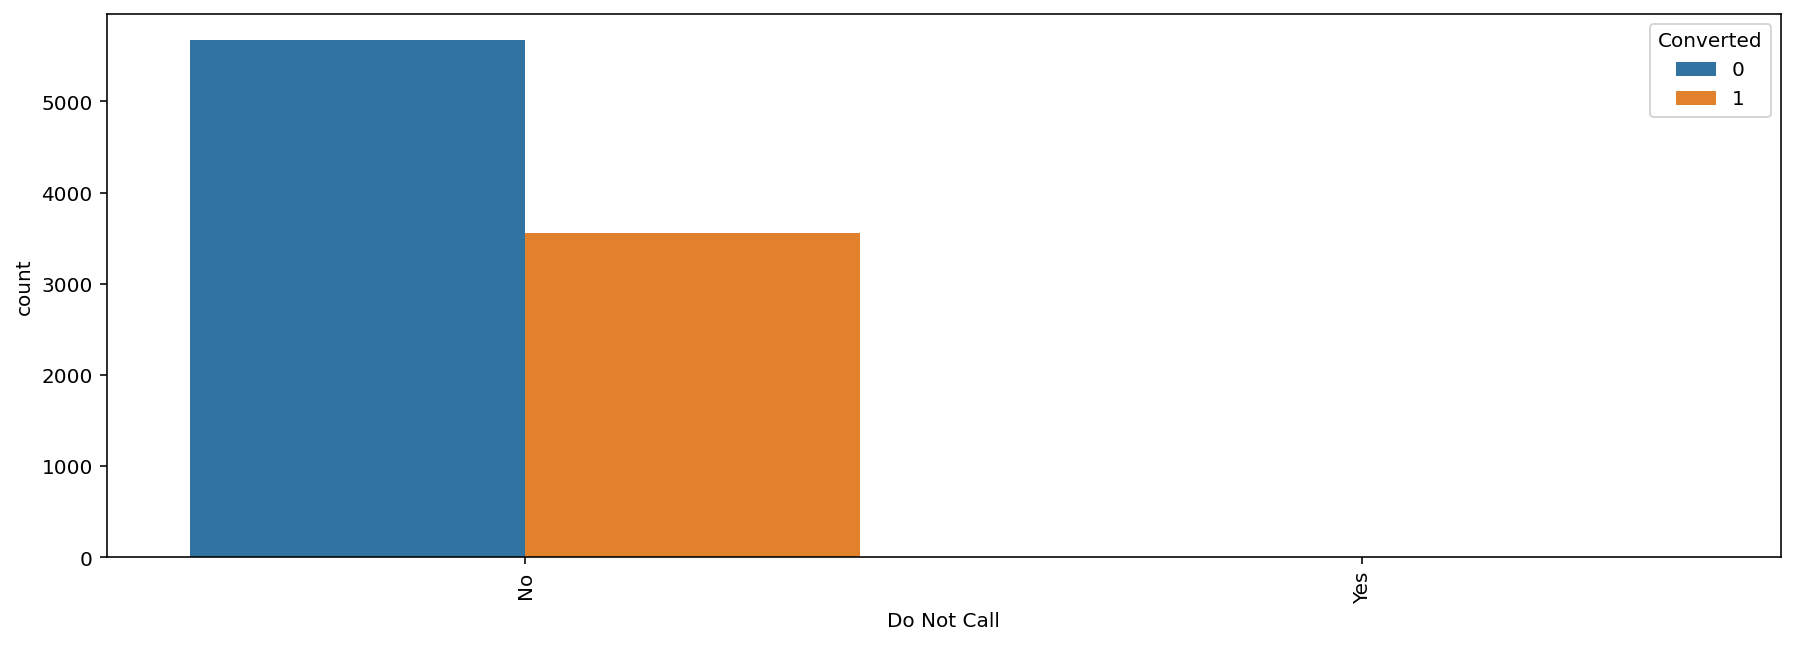

In [64]:
#Lets look into another important variables - Do not email and do not call : some people prefer not to call them or email them when 
# we try to contact them when they show their interest in our institution . lets see how the count of these variables look like :
plt.figure(figsize=(15,5))
c=sns.countplot(lead_study['Do Not Call'],hue=lead_study.Converted)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
plt.show()


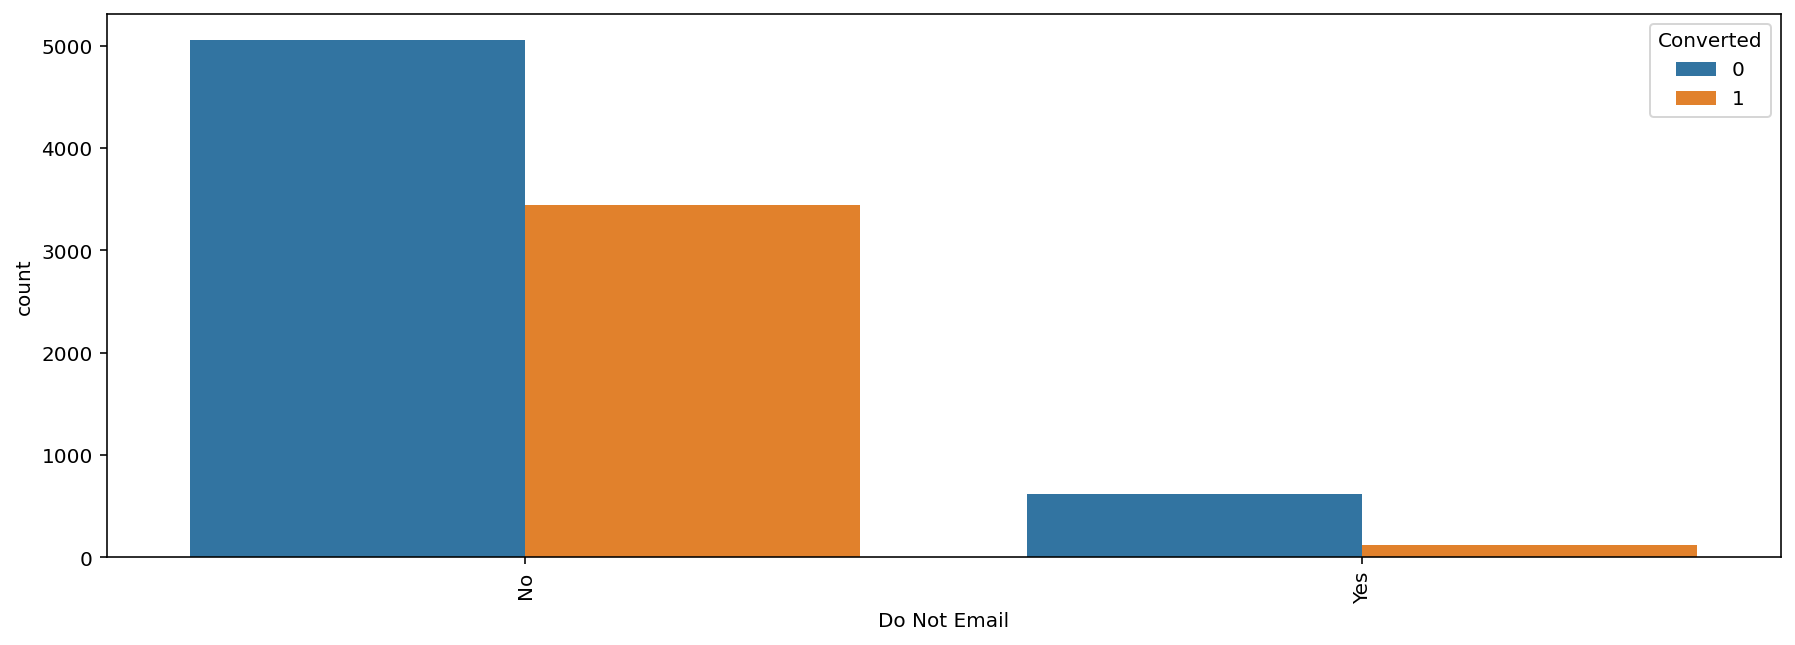

In [65]:
plt.figure(figsize=(15,5))
c=sns.countplot(lead_study['Do Not Email'],hue=lead_study.Converted)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
plt.show()


In [66]:
#Lets look into other important variables - Do not email and do not call : some people prefer not to call them or email them when 
# we try to contact them when they show their interest in our institution . lets see how the count of these variables look like :

In [67]:
# Lets check the value counts for Donot call and therby check for Null values :

lead_study['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [68]:
#Checking the status of Do not email :
lead_study['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [69]:
#Inference : The data is quite skewed in the 'Do Not Call' column with all values except 2 being 'No'. Hence we can drop this column.
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'Do Not Call']

In [70]:
# there are some other variables that contains some imbalances in them with respect to the yes no lead conversion category .Lets look 
# into some of them :

lead_study.Search.value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [71]:
lead_study.Magazine.value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [72]:
lead_study['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [73]:
lead_study['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [74]:
lead_study['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [75]:
lead_study['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [76]:
lead_study['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [77]:
lead_study['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [78]:
lead_study['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [79]:
lead_study['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [80]:
lead_study['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [81]:
lead_study['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [82]:
#Now lets finally add such columns that are imbalanced to the dropped columns list :

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [83]:
lead_study['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Email Received                     1
View in browser link Clicked       1
Approached upfront                 1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [84]:
#Mapping the values that have low counts to 'Others' category:

lead_study['Last Notable Activity']=lead_study['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable','Unsubscribed','Email Bounced','Resubscribed to emails','View in browser link Clicked','Approached upfront','Form Submitted on Website','Email Received'],'Other_Notable_activity')

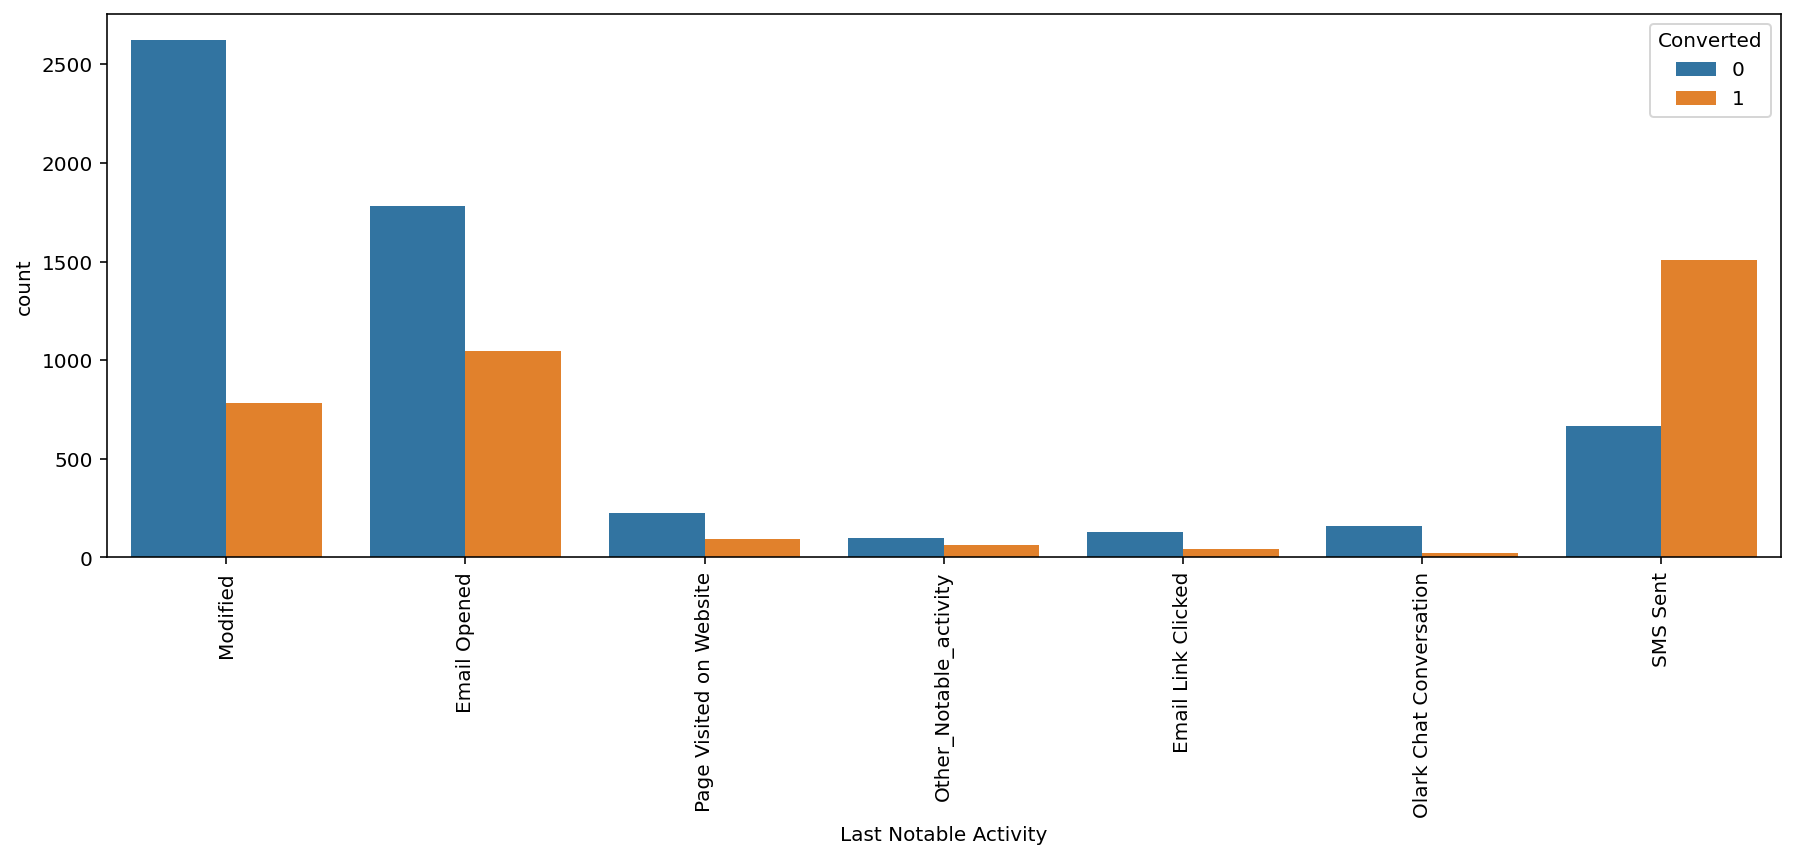

In [85]:
#Lets see the count of notable activity variable :

plt.figure(figsize=(15,5))
c=sns.countplot(lead_study['Last Notable Activity'],hue=lead_study.Converted)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
plt.show()


In [86]:
# lets check the value counts for this variable :

lead_study['Last Notable Activity'].value_counts(dropna=False)

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [87]:
# inference : as you can see that the maximum last notable activity is the status "Modified " and "email opened " followed by "SMS Sent"
# in this case we can see that out of the total sttaus of modified ,those that gets converted into leads is less compared to the conversion 
# of the ones  where the status is "Email opened ". So we can focus our attention in this category of Email opened more and also work towards
# modified ones . SMS sent is another category where we can work on improving the lead score fuly.

In [88]:
# lets see the final list of cols that shall be dropped :
cols_to_drop

['Country',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [89]:
# lets finally drop these columns from our dataframe :

lead_study=lead_study.drop(cols_to_drop,1)
lead_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Specialization                                 9240 

### STEP 4 : DATA ANALYSIS - NUMERICAL AND CATEGORICAL VARIABLES TREATMENT

In [90]:
# lets check the numerical variables percentage that has the conversion status as 1 :

converted_1=(sum(lead_study['Converted'])/len(lead_study['Converted'].index))*100
converted_1

38.53896103896104

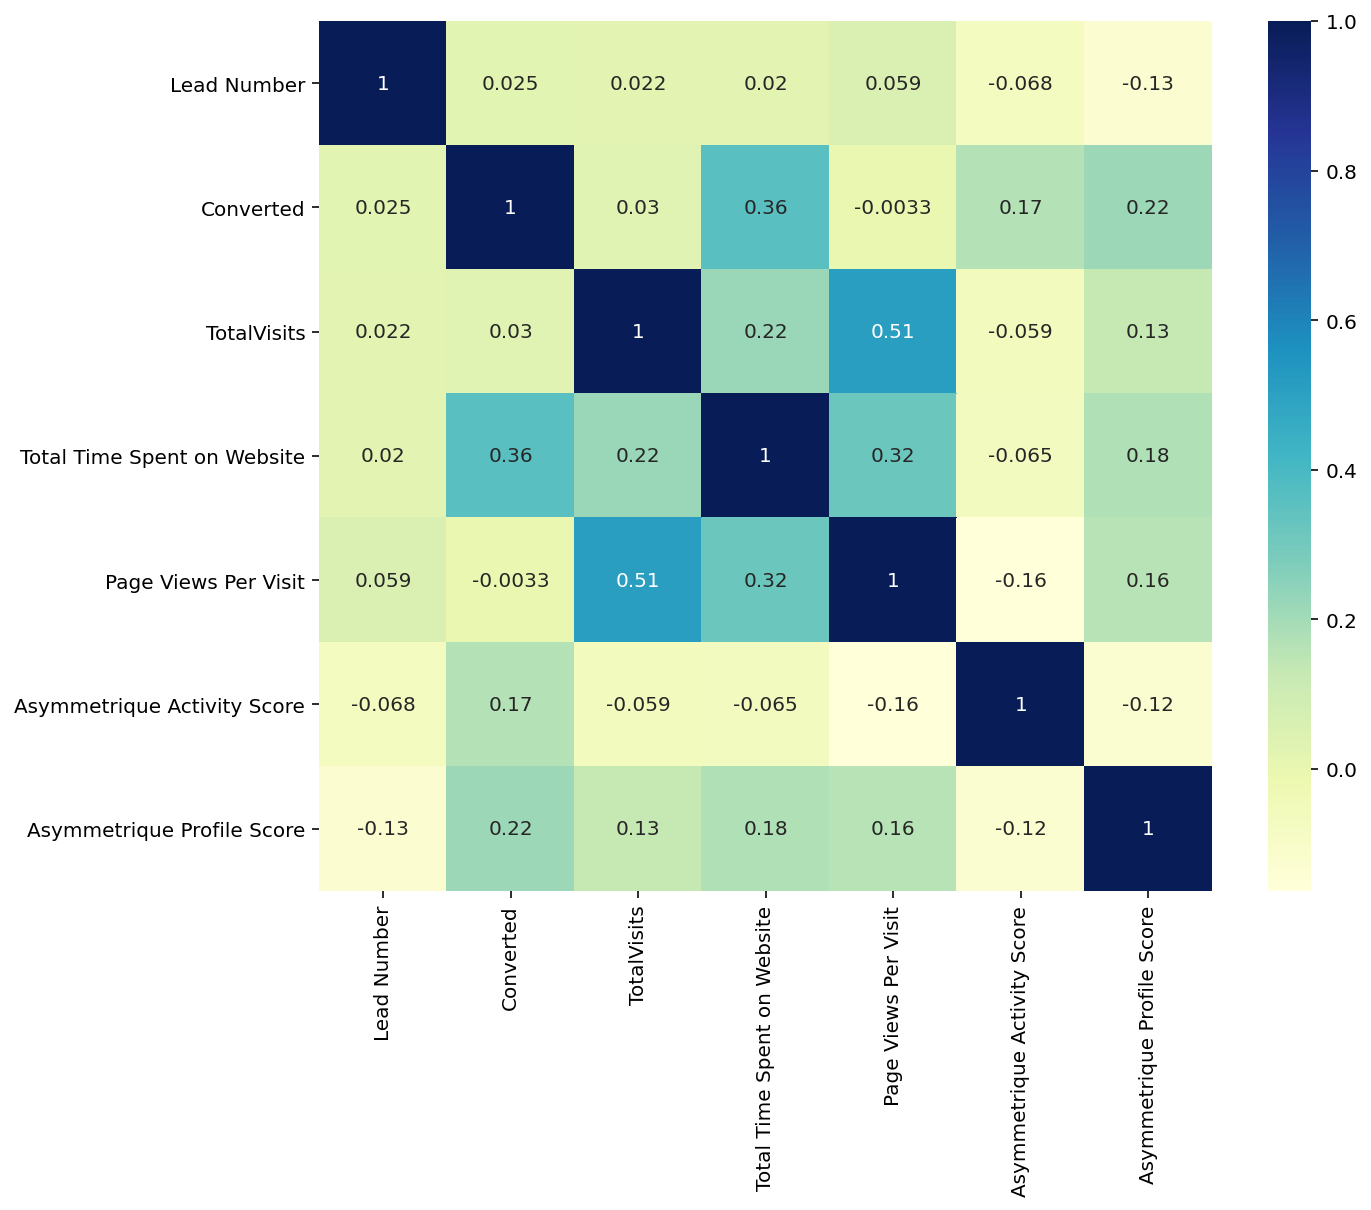

In [91]:
#Heat map to understand the corelation between these numerical variables :

plt.figure(figsize=(10,8))

sns.heatmap(lead_study.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [92]:
# understanding the heat map :

#We can see that the total time spent on website and total visits of the website are positively correlated to naearly 0.22 
# similarly pages views per visit and time spent on website also have a positive orelation to 0.32 
# Total visits and pages views per visit have a corelation of 0.51 as agains the converted ones that has a neagtive corelation .

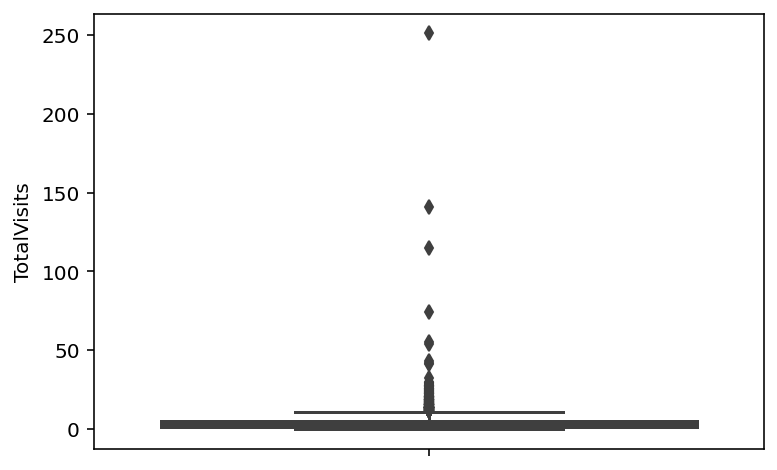

In [93]:
#Lets check on outliers :

plt.figure(figsize=(6,4))
sns.boxplot(y=lead_study['TotalVisits'])
plt.show()

In [94]:
#we can see the presence of outliers in this column

In [95]:
#lets check the percentiles for these outliers for total visits :

lead_study['TotalVisits'].describe(percentiles=[.05,.25,.50,.75,.90,.95,0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

10.0


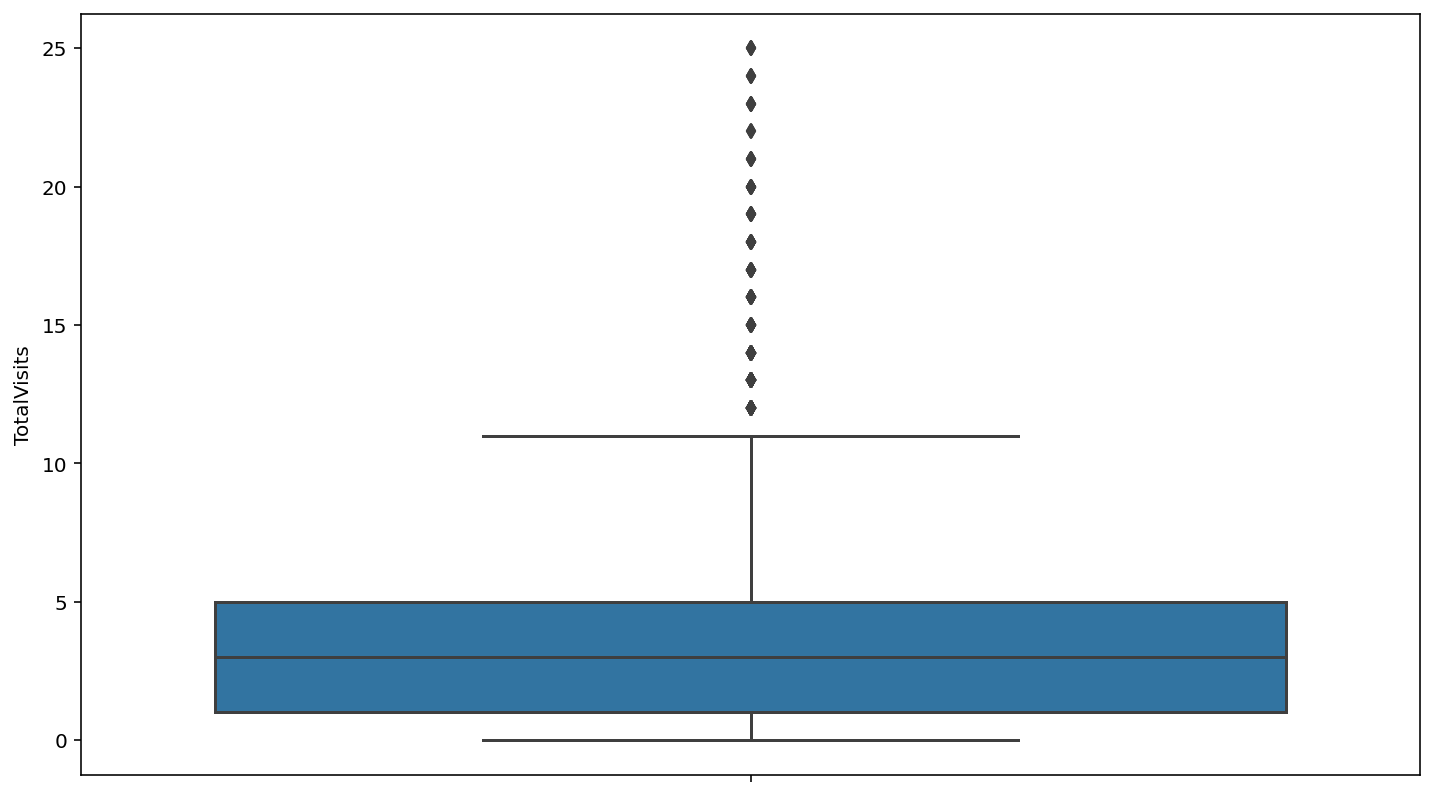

In [96]:
#Removing the outliers :
Q3 = lead_study.TotalVisits.quantile(0.95)
print(Q3)
Q1 = lead_study.TotalVisits.quantile(0.05)
IQR=Q3-Q1
lead_study = lead_study[(lead_study.TotalVisits <= Q3+1.5*IQR) & (lead_study.TotalVisits >= Q1-1.5*IQR)]
sns.boxplot(y=lead_study['TotalVisits'])
plt.show()


In [97]:
#percentiles of "Total time spent on website "

lead_study['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9081.000000
mean      481.476599
std       545.363843
min         0.000000
5%          0.000000
25%         8.000000
50%       244.000000
75%       920.000000
90%      1373.000000
95%      1557.000000
99%      1839.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

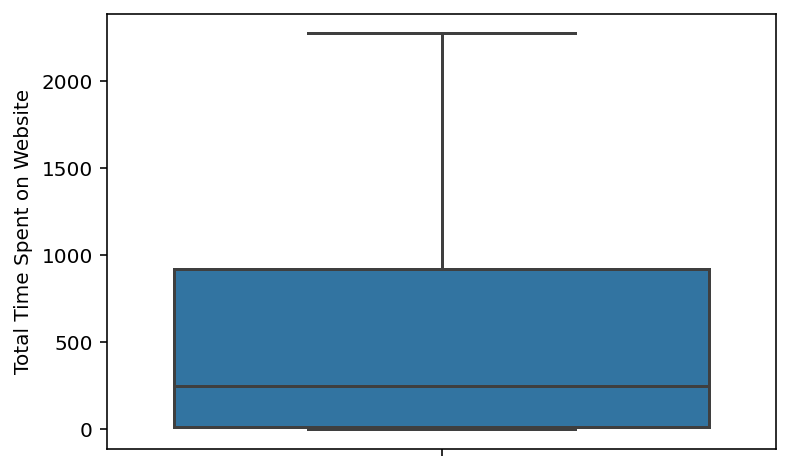

In [98]:
#spread of this variable :
plt.figure(figsize=(6,4))
sns.boxplot(y=lead_study['Total Time Spent on Website'])
plt.show()


In [99]:
#inference : we can see that there are not much outliers for the above data and hence we need not do any otlier treatment for this variable 

In [100]:
# spread of "pages views per visit "
lead_study['Page Views Per Visit'].describe()

count    9081.000000
mean        2.350098
std         2.078922
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        24.000000
Name: Page Views Per Visit, dtype: float64

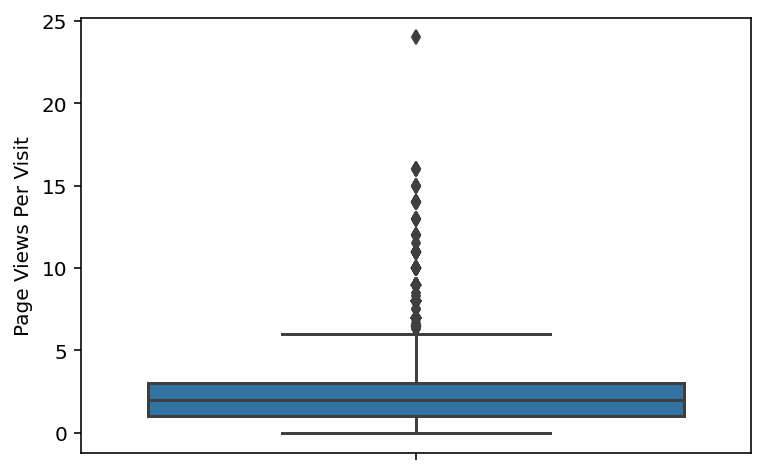

In [101]:
# spread of this numerical variable :

plt.figure(figsize=(6,4))
sns.boxplot(y=lead_study['Page Views Per Visit'])
plt.show()


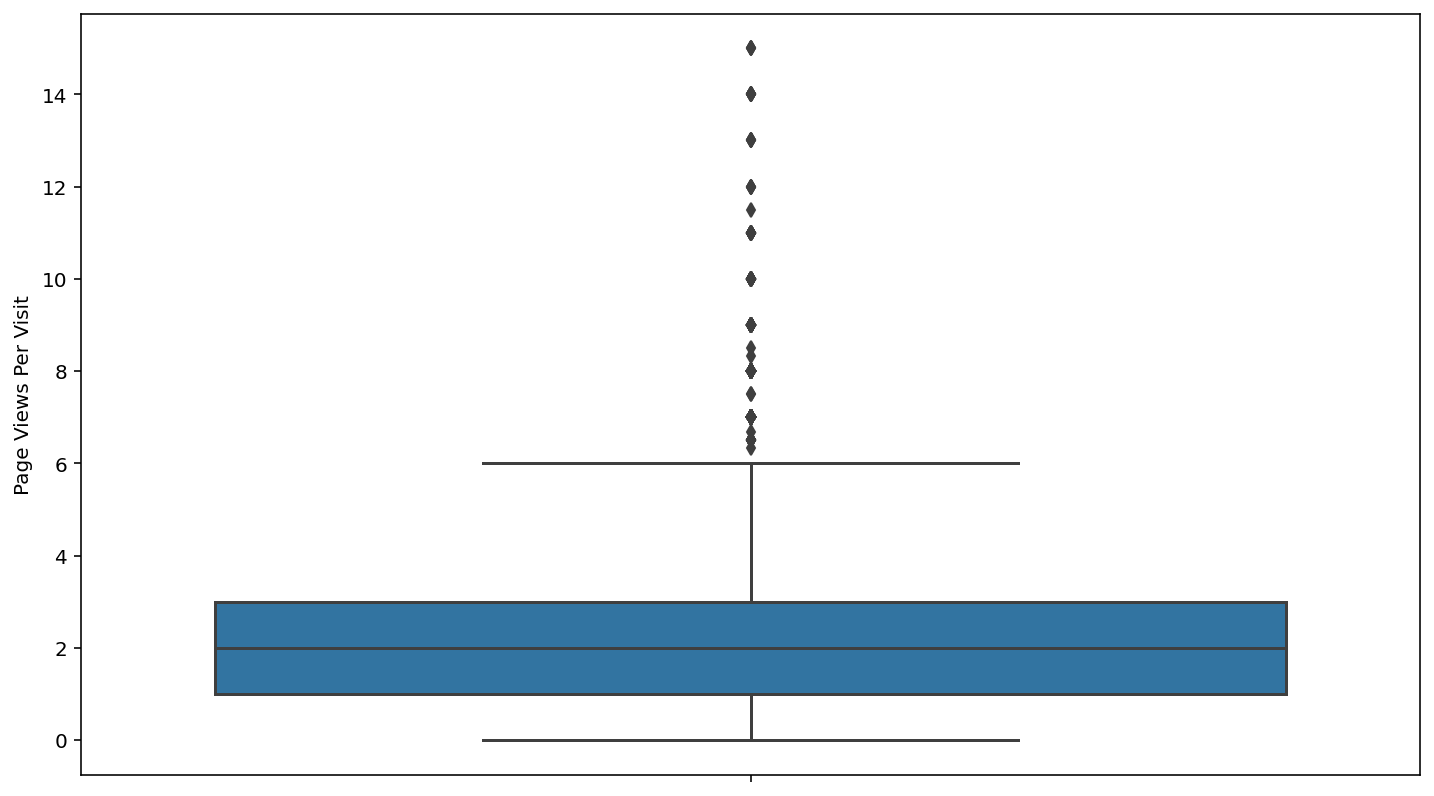

In [102]:
#as you can see that there are outliers 1% + & - : hence treating the same :

Q3 = lead_study['Page Views Per Visit'].quantile(0.95)
Q1 = lead_study['Page Views Per Visit'].quantile(0.05)
IQR=Q3-Q1
lead_study = lead_study[(lead_study['Page Views Per Visit'] <= Q3+1.5*IQR) & (lead_study['Page Views Per Visit'] >= Q1-1.5*IQR)]
sns.boxplot(y=lead_study['Page Views Per Visit'])
plt.show()


In [103]:
lead_study['Last Activity'].value_counts(dropna=False)

Email Opened                 3431
SMS Sent                     2735
Olark Chat Conversation       971
Page Visited on Website       625
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            266
Others                        193
Form Submitted on Website     116
Name: Last Activity, dtype: int64

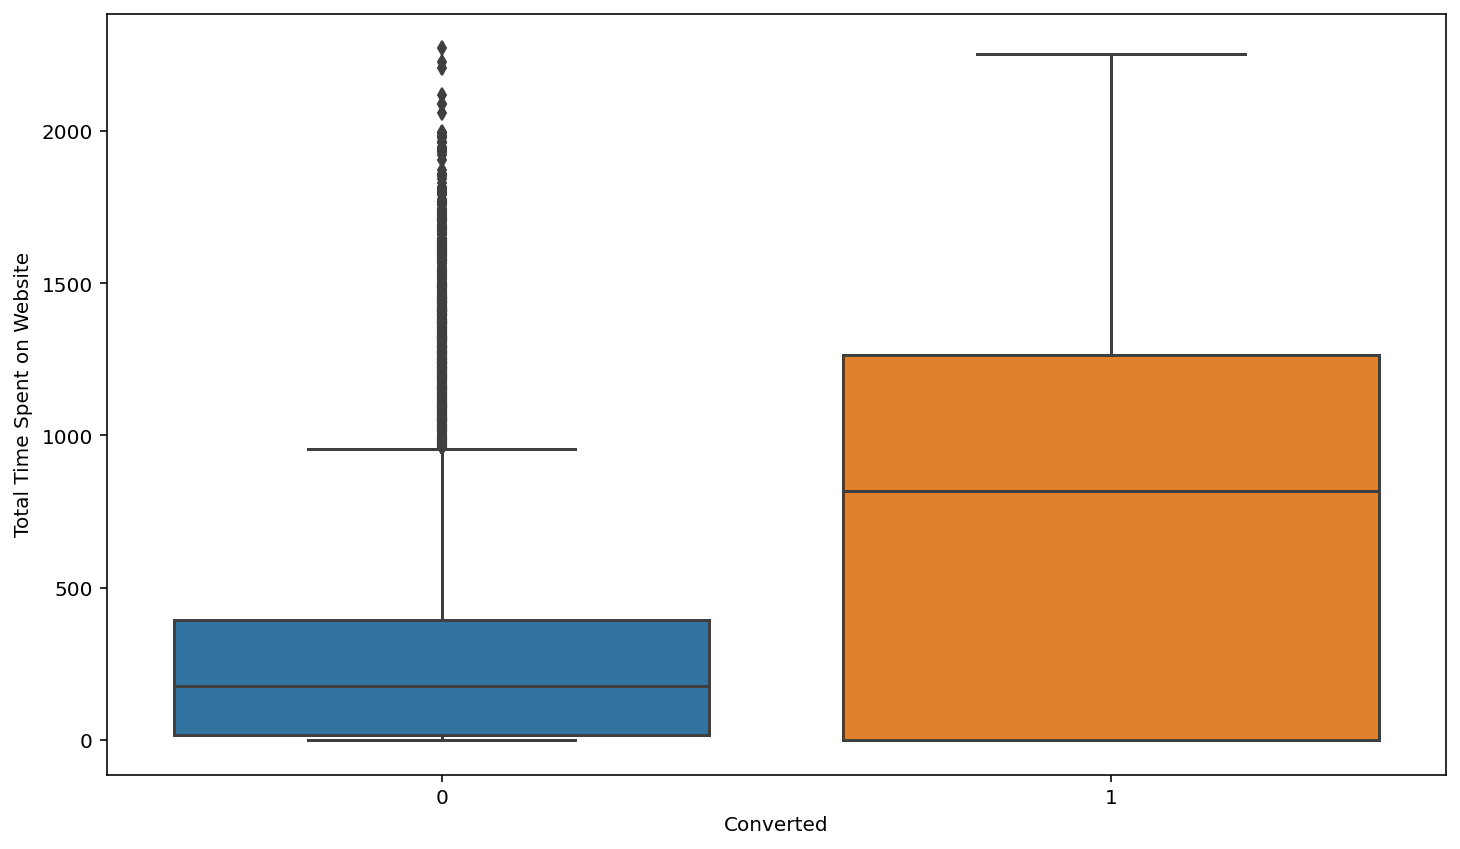

In [104]:
# spread of total time spent on website vs converted variable:
sns.boxplot(x=lead_study.Converted,y=lead_study['Total Time Spent on Website'])
plt.show()


In [105]:
# inference : Those that spend more time on the website are likely to get converted to positive leads 
# we need to make the website more informative so that more number of people spend more time on the website so that the chances of converting 
# into positive leads are more

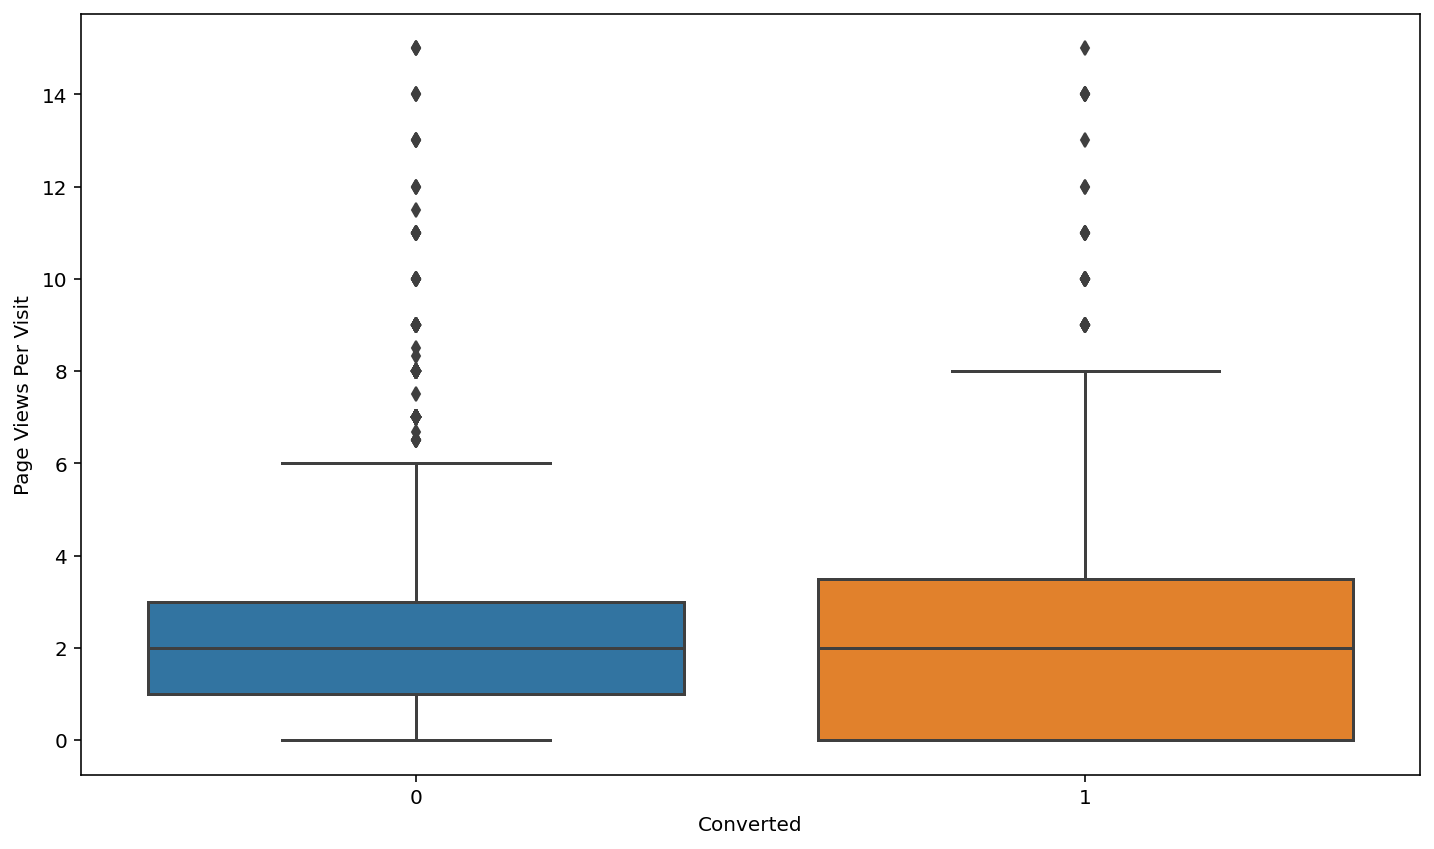

In [106]:
# spread of total time spent on website vs converted variable:
sns.boxplot(x=lead_study.Converted,y=lead_study['Page Views Per Visit'])
plt.show()


In [107]:
# both medians or converted and unconverted leads is same 
# not much information is said on lead conversion from page views per visit.

In [108]:
round(100*(lead_study.isnull().sum()/len(lead_study.index)),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.32
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Tags                                             36.61
City                                              0.00
Asymmetrique Activity Index                       0.00
Asymmetrique Profile Index                        0.00
Asymmetrique Activity Score                      45.78
Asymmetrique Profile Score                       45.78
A free cop

In [109]:
#Treatment of Categorical Variables -Dummy variable creation :

cat_cols1=lead_study.select_dtypes(include=['object']).columns
cat_cols1

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [110]:
# list of variables to map :
varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_study[varlist] = lead_study[varlist].apply(binary_map)


In [111]:
# dummy variables creation :Lead Origin
dummy = pd.get_dummies(lead_study[['Lead Origin']], drop_first=True)
dummy.head()
lead_study = pd.concat([lead_study,dummy],1)
#Placeholder for adding columns which need to be deleted later as their dummy values have been added in the dataset
delCol=['Lead Origin']

In [112]:
# dummy variables creation :City
dummy = pd.get_dummies(lead_study['City'], prefix  = 'City')
dummy = dummy.drop(['City_Tier II Cities'], 1)
delCol.append('City')
lead_study = pd.concat([lead_study, dummy], axis = 1)

In [113]:
# dummy variables creation :What is your current occupation
dummy = pd.get_dummies(lead_study['What is your current occupation'], prefix  = 'CurrOccupation',drop_first=True)
#dummy = dummy.drop(['CurrOccupation_Not Specified'], 1)
delCol.append('What is your current occupation')
lead_study = pd.concat([lead_study, dummy], axis = 1)

In [114]:
# dummy variables creation :Specialization
dummy = pd.get_dummies(lead_study['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
lead_study = pd.concat([lead_study, dummy], axis = 1)
delCol.append('Specialization')

In [115]:
# dummy variables creation :What matters most to you in choosing a course
dummy = pd.get_dummies(lead_study['What matters most to you in choosing a course'], prefix  = 'MostMattersInChoosing')
dummy = dummy.drop(['MostMattersInChoosing_Not Specified'], 1)
lead_study = pd.concat([lead_study, dummy], axis = 1)
delCol.append('What matters most to you in choosing a course')

In [116]:
# dummy variables creation :What is your current occupation
dummy = pd.get_dummies(lead_study['Lead Source'], prefix  = 'Lead Source',drop_first=True)
lead_study = pd.concat([lead_study, dummy], axis = 1)
delCol.append('Lead Source')

In [117]:
# dummy variables creation :What is your current occupation
dummy = pd.get_dummies(lead_study['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
lead_study = pd.concat([lead_study, dummy], axis = 1)
delCol.append('Last Activity')

In [118]:
# dummy variables creation :Last Notable Activity
dummy = pd.get_dummies(lead_study['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
lead_study = pd.concat([lead_study, dummy], axis = 1)
delCol.append('Last Notable Activity')

In [119]:

# dummy variables creation :Asymmetrique Activity Index
dummy = pd.get_dummies(lead_study['Asymmetrique Activity Index'], prefix  = 'ActivityIdx')
dummy = dummy.drop(['ActivityIdx_Not Specified'], 1)
lead_study = pd.concat([lead_study, dummy], axis = 1)
delCol.append('Asymmetrique Activity Index')



In [120]:
# dummy variables creation :Asymmetrique Profile Index
dummy = pd.get_dummies(lead_study['Asymmetrique Profile Index'], prefix  = 'ProfileIdx')
dummy = dummy.drop(['ProfileIdx_Not Specified'], 1)
lead_study = pd.concat([lead_study, dummy], axis = 1)
delCol.append('Asymmetrique Profile Index')

In [121]:
#Tags Column is dropped because the main intent is to Identify the probable leads to whom the sales teams can make calls to. The assumption to drop this column was that the tags were updated against the leads after calling up the customers. The Asymmetric Score and Profile score were dropped as the Activity and Profile Indexes were created basis the score and hence only one of these columns will be sufficient.
delCol.append('Tags')
delCol.append('Asymmetrique Activity Score')
delCol.append('Asymmetrique Profile Score')

In [122]:
delCol

['Lead Origin',
 'City',
 'What is your current occupation',
 'Specialization',
 'What matters most to you in choosing a course',
 'Lead Source',
 'Last Activity',
 'Last Notable Activity',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Tags',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [123]:
# dropping the original columns after dummy variables creation :

lead_study.drop(delCol,1,inplace=True)

### STEP 5 : TRAIN TEST SPLIT AND RELATED WORKINGS 

In [124]:
from sklearn.model_selection import train_test_split

# putting the response variable to y :

y=lead_study['Converted']
LeadNoDF=lead_study['Lead Number']
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [125]:
X=lead_study.drop(['Converted','Lead Number'],axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Mumbai,City_Other Cities,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,ActivityIdx_01.High,ActivityIdx_02.Medium,ActivityIdx_03.Low,ProfileIdx_01.High,ProfileIdx_02.Medium,ProfileIdx_03.Low
0,0,0.0,0,0.0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0


In [126]:
# Train and test split :

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)


In [127]:
#Scaling of data :
# scaling numerical data:

from sklearn.preprocessing import StandardScaler 

scaler=StandardScaler()

num_cols=X_train.select_dtypes(include=['float64','int64']).columns

X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_test[num_cols]=scaler.transform(X_test[num_cols])


### STEP 6 : MODEL BUILDING USING RFE AND VIF 

In [128]:
#Building the first model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [129]:
X_train_sm=sm.add_constant(X_train)
logm=sm.GLM(y_train,X_train_sm,families=sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6294
Model Family:                Gaussian   Df Model:                           58
Link Function:               identity   Scale:                         0.12932
Method:                          IRLS   Log-Likelihood:                -2486.9
Date:                Sun, 19 Apr 2020   Deviance:                       813.79
Time:                        21:29:10   Pearson chi2:                     814.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.4974      0.158      3.145      0.002       0.187       0.807
Do Not Email                                        -0.0418      0.006     -6.903      0.000      -0.054      -0.030
TotalVisits                                          0.0432      0.007      6.307      0.000       0.030       0.057
Total Time Spent on Website                          0.1744      0.005     33.096      0.000       0.164       0.185
Page Views Per Visit                                -0.0399      0.007     -5.466      0.000      -0.054      -0.026
A free copy of Mastering The Interview              -0.0184      0.007     -2.779      0.005      -0.031      -0.005
Lead Origin_Landing Page Submission                 -0.1274      0.019     -6.634      0.000      -0.165      -0.090
Lead Origin_Lead Add Form                            0.5471      0.081      6.713      0.000       0.387       0.707
Lead Origin_Lead Import                              0.0428      0.190      0.225      0.822      -0.330       0.415
City_Mumbai                                         -0.0580      0.049     -1.178      0.239      -0.154       0.038
City_Other Cities                                    0.0006      0.051      0.011      0.991      -0.100       0.101
City_Other Cities of Maharashtra                    -0.0401      0.053     -0.760      0.447      -0.144       0.063
City_Other Metro Cities                              0.0173      0.053      0.324      0.746      -0.087       0.122
City_Thane & Outskirts                              -0.0402      0.051     -0.784      0.433      -0.141       0.060
CurrOccupation_Housewife                             0.3928      0.209      1.877      0.061      -0.017       0.803
CurrOccupation_Other                                -0.1006      0.184     -0.548      0.584      -0.461       0.259
CurrOccupation_Student                              -0.1159      0.152     -0.764      0.445      -0.413       0.181
CurrOccupation_Unemployed                           -0.1636      0.149     -1.102      0.271      -0.455       0.127
CurrOccupation_Working Professional                  0.1123      0.149      0.752      0.452      -0.181       0.405
Specialization_Banking, Investment And Insurance     0.1538      0.028      5.418      0.000       0.098       0.209
Specialization_Business Administration               0.0812      0.027      2.980      0.003       0.028       0.135
Specialization_E-Business                            0.1550      0.058      2.680      0.007       0.042       0.268
Specialization_E-COMMERCE                            0.1512      0.047      3.237      0.001       0.060       0.243
Specialization_International Business    

In [130]:
#Applying Feature Selection to the training data
from sklearn.feature_selection import RFE
lm=LogisticRegression()
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)
rfe.support_

array([False, False,  True, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
        True,  True, False,  True,  True,  True,  True, False, False,
       False, False,  True, False, False, False])

In [131]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 22),
 ('TotalVisits', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('A free copy of Mastering The Interview', False, 40),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 28),
 ('City_Mumbai', False, 31),
 ('City_Other Cities', False, 44),
 ('City_Other Cities of Maharashtra', False, 32),
 ('City_Other Metro Cities', False, 41),
 ('City_Thane & Outskirts', False, 33),
 ('CurrOccupation_Housewife', True, 1),
 ('CurrOccupation_Other', False, 9),
 ('CurrOccupation_Student', False, 7),
 ('CurrOccupation_Unemployed', False, 6),
 ('CurrOccupation_Working Professional', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 11),
 ('Specialization_Business Administration', False, 19),
 ('Specialization_E-Business', False, 13),
 ('Specialization_E-COMMERCE', False, 17),
 ('Specialization_International Business', False, 18),
 (

In [132]:
newRFECols=X_train.columns[rfe.support_]
newX_train=X_train[newRFECols]

In [133]:
#Applying the Logistic Regression model with the set of new columns
X_train_sm=sm.add_constant(newX_train)
logr1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logr1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.3
Date:                Sun, 19 Apr 2020   Deviance:                       5148.6
Time:                        21:29:50   Pearson chi2:                 6.58e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.9830      0.099     -9.967      0.000      -1.176      -0.790
Total Time Spent on Website                       1.1132      0.041     27.431      0.000       1.034       1.193
Lead Origin_Lead Add Form                         3.6649      0.231     15.856      0.000       3.212       4.118
CurrOccupation_Housewife                         23.0001   1.76e+04      0.001      0.999   -3.45e+04    3.45e+04
CurrOccupation_Working Professional               2.4745      0.187     13.207      0.000       2.107       2.842
MostMattersInChoosing_Better Career Prospects     1.2069      0.088     13.750      0.000       1.035       1.379
Lead Source_Olark Chat                            1.3840      0.105     13.160      0.000       1.178       1.590
Lead Source_Welingak Website                      1.8550      0.759      2.445      0.014       0.368       3.342
Last Activity_Email Bounced                      -2.6527      0.391     -6.782      0.000      -3.419      -1.886
Last Activity_Olark Chat Conversation            -1.2042      0.189     -6.385      0.000      -1.574      -0.835
Last Activity_Page Visited on Website            -1.2826      0.157     -8.147      0.000      -1.591      -0.974
Last Notable Activity_Email Link Clicked         -1.9346      0.290     -6.679      0.000      -2.502      -1.367
Last Notable Activity_Email Opened               -1.1044      0.085    -12.931      0.000      -1.272      -0.937
Last Notable Activity_Modified                   -1.3822      0.095    -14.529      0.000      -1.569      -1.196
Last Notable Activity_Olark Chat Conversation    -1.4643      0.374     -3.917      0.000      -2.197      -0.732
ActivityIdx_03.Low                               -2.0556      0.303     -6.794      0.000      -2.649      -1.463
=================================================================================================================
"""

    ### STEP 7 : EVALUATION OF THE MODEL - CHECKING THE PREDICTED VALUES ON TRAINED SET WITH VARIOUS MODEL OUTPUTS

In [134]:
y_train_pred=res.predict(X_train_sm)
y_train_pred=y_train_pred.values.reshape(-1,)
y_train_pred

array([0.36618314, 0.19272561, 0.61658746, ..., 0.85822664, 0.55980097,
       0.21467849])

In [135]:
y_train_pred_final=pd.DataFrame({"ConvLead":y_train,"LeadProb":y_train_pred})
y_train_pred_final["Predicted"]=y_train_pred_final['LeadProb'].map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,ConvLead,LeadProb,Predicted
7856,1,0.366183,0
2257,0,0.192726,0
851,1,0.616587,1
7141,0,0.114735,0
6337,0,0.293114,0


In [136]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_train_pred_final.ConvLead,y_train_pred_final.Predicted)
confusion_matrix

array([[3478,  436],
       [ 726, 1713]])

In [137]:
#Lets check the overall Accuracy
print(metrics.accuracy_score(y_train_pred_final.ConvLead,y_train_pred_final.Predicted))

0.817094286164017


In [138]:
#Creating a common function for checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def checkVIF(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)


In [139]:
#Checking the VIF Scores for manually removing unwanted features
checkVIF(newX_train)

## VIF Scores all are within acceptable range and it is not required to drop any columns

                                         Features   VIF
4   MostMattersInChoosing_Better Career Prospects  2.16
8           Last Activity_Olark Chat Conversation  2.00
12                 Last Notable Activity_Modified  1.91
5                          Lead Source_Olark Chat  1.67
1                       Lead Origin_Lead Add Form  1.59
11             Last Notable Activity_Email Opened  1.47
13  Last Notable Activity_Olark Chat Conversation  1.36
6                    Lead Source_Welingak Website  1.32
0                     Total Time Spent on Website  1.29
3             CurrOccupation_Working Professional  1.19
7                     Last Activity_Email Bounced  1.10
9           Last Activity_Page Visited on Website  1.10
14                             ActivityIdx_03.Low  1.06
10       Last Notable Activity_Email Link Clicked  1.03
2                        CurrOccupation_Housewife  1.00


In [140]:
#Since All VIF's are in acceptable range, dropping column with high p-Value
newRFECols=newRFECols.drop('CurrOccupation_Housewife')

In [141]:
#Building Model 2
X_train=X_train[newRFECols]
X_train_sm=sm.add_constant(X_train)
lm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2579.6
Date:                Sun, 19 Apr 2020   Deviance:                       5159.2
Time:                        21:29:51   Pearson chi2:                 6.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.9854      0.099     -9.994      0.000      -1.179      -0.792
Total Time Spent on Website                       1.1124      0.041     27.435      0.000       1.033       1.192
Lead Origin_Lead Add Form                         3.6650      0.231     15.868      0.000       3.212       4.118
CurrOccupation_Working Professional               2.4688      0.187     13.179      0.000       2.102       2.836
MostMattersInChoosing_Better Career Prospects     1.2117      0.088     13.810      0.000       1.040       1.384
Lead Source_Olark Chat                            1.3791      0.105     13.124      0.000       1.173       1.585
Lead Source_Welingak Website                      1.8469      0.759      2.434      0.015       0.360       3.334
Last Activity_Email Bounced                      -2.6555      0.391     -6.792      0.000      -3.422      -1.889
Last Activity_Olark Chat Conversation            -1.2100      0.189     -6.418      0.000      -1.580      -0.840
Last Activity_Page Visited on Website            -1.2858      0.157     -8.170      0.000      -1.594      -0.977
Last Notable Activity_Email Link Clicked         -1.9340      0.290     -6.677      0.000      -2.502      -1.366
Last Notable Activity_Email Opened               -1.0988      0.085    -12.876      0.000      -1.266      -0.932
Last Notable Activity_Modified                   -1.3740      0.095    -14.468      0.000      -1.560      -1.188
Last Notable Activity_Olark Chat Conversation    -1.4557      0.374     -3.894      0.000      -2.188      -0.723
ActivityIdx_03.Low                               -2.0603      0.302     -6.812      0.000      -2.653      -1.468
=================================================================================================================
"""

In [142]:
#Predicting Value
y_train_pred=res.predict(X_train_sm)
y_train_pred=y_train_pred.values.reshape(-1,)
y_train_pred_final["LeadProb2"]=y_train_pred
y_train_pred_final["Predicted_model2"]=y_train_pred_final['LeadProb2'].map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()


,ConvLead,LeadProb,Predicted,LeadProb2,Predicted_model2
7856,1,0.366183,0,0.367956,0
2257,0,0.192726,0,0.194384,0
851,1,0.616587,1,0.618225,1
7141,0,0.114735,0,0.114831,0
6337,0,0.293114,0,0.294744,0


In [143]:
#Lets check the overall Accuracy
print(metrics.accuracy_score(y_train_pred_final.ConvLead,y_train_pred_final.Predicted_model2))

0.8164646623642373


We see that the accuracy score has not been impacted by removal of the column

In [144]:
#Again checking VIF:
checkVIF(X_train)

                                         Features   VIF
3   MostMattersInChoosing_Better Career Prospects  2.16
7           Last Activity_Olark Chat Conversation  2.00
11                 Last Notable Activity_Modified  1.91
4                          Lead Source_Olark Chat  1.67
1                       Lead Origin_Lead Add Form  1.59
10             Last Notable Activity_Email Opened  1.47
12  Last Notable Activity_Olark Chat Conversation  1.36
5                    Lead Source_Welingak Website  1.32
0                     Total Time Spent on Website  1.29
2             CurrOccupation_Working Professional  1.19
6                     Last Activity_Email Bounced  1.10
8           Last Activity_Page Visited on Website  1.10
13                             ActivityIdx_03.Low  1.06
9        Last Notable Activity_Email Link Clicked  1.03


In [145]:
confusion_matrix=metrics.confusion_matrix(y_train_pred_final.ConvLead,y_train_pred_final.Predicted_model2)
confusion_matrix

array([[3477,  437],
       [ 729, 1710]])

In [146]:
# Actual/Predicted     not_churn    churn
        # not_churn        3477      437
        # churn            729       1710  

In [147]:
#Checking other metrics:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [148]:
# Calculating the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7011070110701108

In [149]:
# Calculating the Specificity of our logistic regression model
TN / float(TN+FP)

0.8883495145631068

In [150]:
# Calculate false postive rate - predicting a lead to have converted when actually they did not
print(FP/ float(TN+FP))

0.11165048543689321


In [151]:
# Calculating positive predictive value 
print (TP / float(TP+FP))

0.7964601769911505


In [152]:
# Calculating Negative predictive value
print (TN / float(TN+ FN))

0.8266761768901569


### STEP 8 : EVALUATION OF THE MODEL USING CONFUSION MATRIX AND ROC

In [153]:
#Next we will check the ROC score. We will first define a funtion and then call it to calculate Our ROC Score
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [154]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.ConvLead, y_train_pred_final.LeadProb2, drop_intermediate = False )

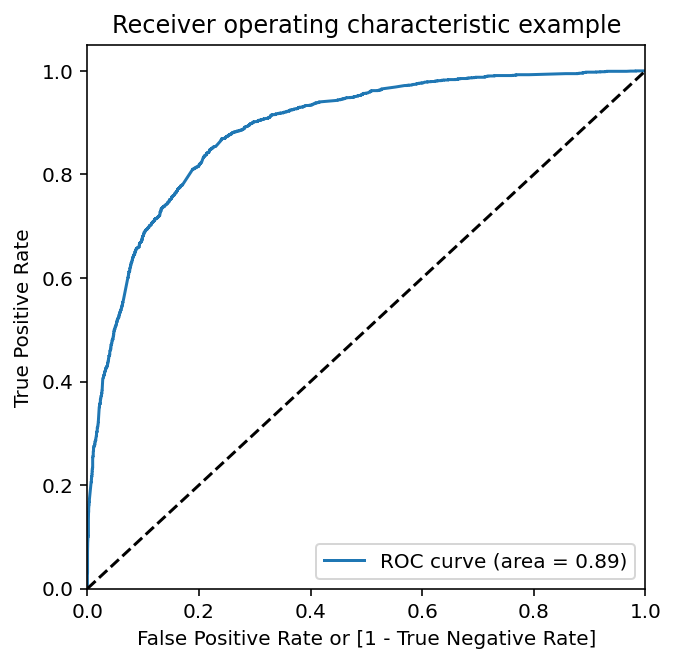

In [155]:
draw_roc(y_train_pred_final.ConvLead, y_train_pred_final.LeadProb2)

#Looking at the ROC plot, the curce traces the left border and the top border as well thus implying the high accuracy of the test being conducted

In [156]:
#Next we will try to find a more accurate cut-off point.
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.LeadProb2.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,ConvLead,LeadProb,Predicted,LeadProb2,Predicted_model2,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7856,1,0.366183,0,0.367956,0,1,1,1,1,0,0,0,0,0,0
2257,0,0.192726,0,0.194384,0,1,1,0,0,0,0,0,0,0,0
851,1,0.616587,1,0.618225,1,1,1,1,1,1,1,1,0,0,0
7141,0,0.114735,0,0.114831,0,1,1,0,0,0,0,0,0,0,0
6337,0,0.293114,0,0.294744,0,1,1,1,0,0,0,0,0,0,0


In [157]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.ConvLead, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.383913     1.000000     0.000000
0.1   0.1  0.616402     0.978680     0.390649
0.2   0.2  0.760743     0.915539     0.664282
0.3   0.3  0.798048     0.871259     0.752427
0.4   0.4  0.811900     0.767528     0.839550
0.5   0.5  0.816465     0.701107     0.888350
0.6   0.6  0.810326     0.635506     0.919264
0.7   0.7  0.782308     0.519475     0.946091
0.8   0.8  0.758854     0.425174     0.966786
0.9   0.9  0.713049     0.270193     0.989014


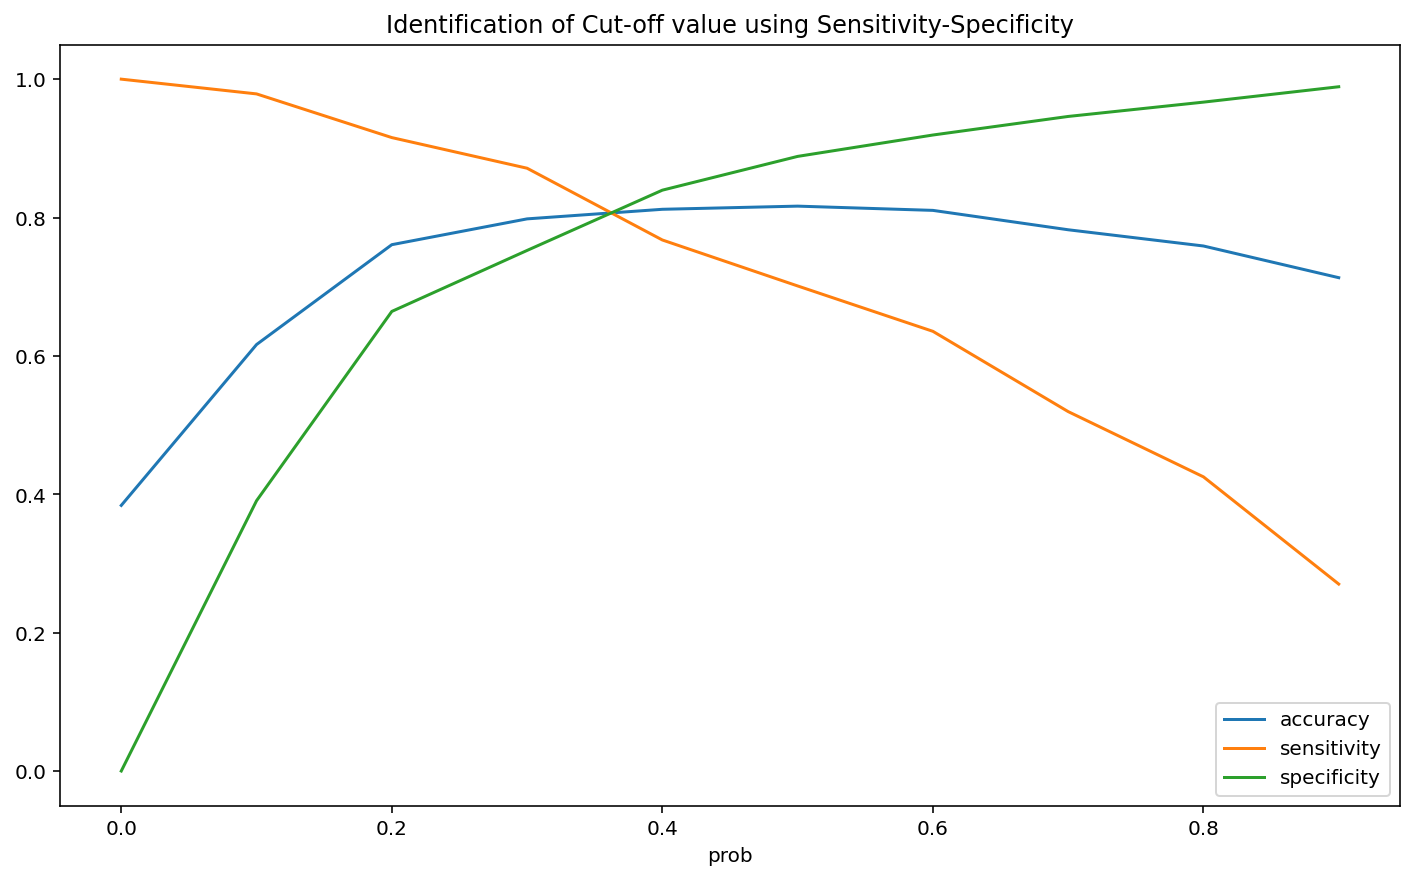

In [158]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.title("Identification of Cut-off value using Sensitivity-Specificity")
plt.show()

### Basis the above graph, we can see that the intersection of the curves is at approximately 0.375.  Since we need the sensitivity at more than 80% we will go with the cut-off at 0.3

In [159]:
#Calculating the new predicted values:
y_train_pred_final['final_predicted'] = y_train_pred_final.LeadProb2.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,ConvLead,LeadProb,Predicted,LeadProb2,Predicted_model2,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
7856,1,0.366183,0,0.367956,0,1,1,1,1,0,0,0,0,0,0,1
2257,0,0.192726,0,0.194384,0,1,1,0,0,0,0,0,0,0,0,0
851,1,0.616587,1,0.618225,1,1,1,1,1,1,1,1,0,0,0,1
7141,0,0.114735,0,0.114831,0,1,1,0,0,0,0,0,0,0,0,0
6337,0,0.293114,0,0.294744,0,1,1,1,0,0,0,0,0,0,0,0


In [160]:
confusion_matrix=metrics.confusion_matrix(y_train_pred_final.ConvLead,y_train_pred_final.final_predicted)
print(metrics.accuracy_score(y_train_pred_final.ConvLead,y_train_pred_final.final_predicted))

0.7980481662206832


In [161]:
#Checking other metrics:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

Sensitivity=TP/float(TP+FN)
Specificity=TN/float(TN+FP)

print("Sensitivity:",round(Sensitivity,2))
print("Specificity:",round(Specificity,2))

Sensitivity: 0.87
Specificity: 0.75


### Basis the cutoff the accuracy seems to increase marginally

In [162]:
# Calculating Precision and Recall for the above model
#Precision= TP/TP+FN
precision=metrics.precision_score(y_train_pred_final.ConvLead,y_train_pred_final.final_predicted)
precision

0.6868131868131868

In [163]:
#Calculating Recall
recall=metrics.recall_score(y_train_pred_final.ConvLead,y_train_pred_final.final_predicted)
recall

0.8712587125871258

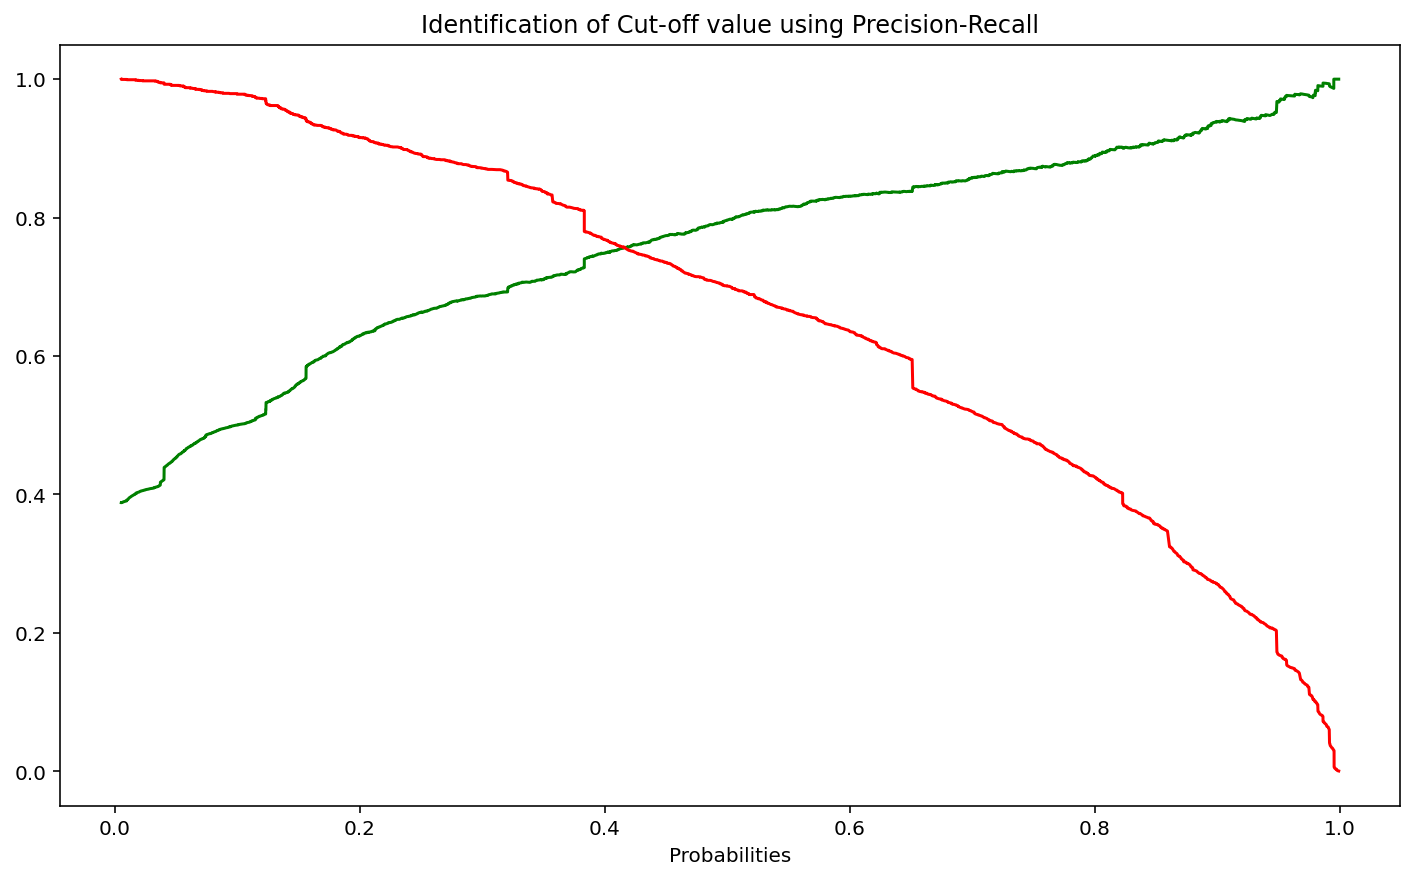

In [164]:
#Plotting the Preceision Recall Curve
p, r, thresholds=metrics.precision_recall_curve(y_train_pred_final.ConvLead,y_train_pred_final.LeadProb2)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probabilities")
plt.title("Identification of Cut-off value using Precision-Recall")
plt.show()

### Here we see that the ideal cut-off seems to be at 0.425

In [165]:
#Calculating the new predicted values:
y_train_pred_final['final_predicted'] = y_train_pred_final.LeadProb2.map( lambda x: 1 if x > 0.425 else 0)


In [166]:
print(metrics.accuracy_score(y_train_pred_final.ConvLead,y_train_pred_final.final_predicted))

0.8133165433653392


### Here again we see that the accuray has decreased slightly from the cut-off level of 0.3 obtained as per our Sensitivity - Specificity analysis.

### Making Predictions using the above model and taking cut-off value as 0.3

### STEP 9 : RUNNING THE MODEL ON TEST DATA

In [167]:
newX_test=X_test[newRFECols]
newX_test_sm=sm.add_constant(newX_test)

In [168]:
y_test_pred=res.predict(newX_test_sm)
y_test_pred

1342    0.114684
8169    0.397449
1632    0.129727
2743    0.140576
6133    0.040224
          ...   
2336    0.383328
6790    0.015790
6287    0.320691
8489    0.148757
7268    0.902500
Length: 2724, dtype: float64

In [169]:
y_test_pred_final=pd.DataFrame({"ConvLead_test":y_test,"LeadProb_test":(y_test_pred)})

In [170]:
y_test_pred_final["Predicted_test"]=y_test_pred_final['LeadProb_test'].map(lambda x:1 if x>0.30 else 0)
#Adding a Score for each lead as per the ask in the assignment to have a lead score between 0 - 100
y_test_pred_final["Lead Score"]=round(y_test_pred_final['LeadProb_test'].apply(lambda x:x*100.00),2)
y_test_pred_final.head()

,ConvLead_test,LeadProb_test,Predicted_test,Lead Score
1342,1,0.114684,0,11.47
8169,0,0.397449,1,39.74
1632,0,0.129727,0,12.97
2743,0,0.140576,0,14.06
6133,0,0.040224,0,4.02


In [171]:
confusion2=metrics.confusion_matrix(y_test_pred_final.ConvLead_test,y_test_pred_final.Predicted_test)
confusion2

array([[1278,  431],
       [ 135,  880]])

In [172]:
print(metrics.accuracy_score(y_test_pred_final.ConvLead_test,y_test_pred_final.Predicted_test))

0.7922173274596183


In [173]:
#Calculating the Sensitivity of the test data
print(confusion2[1,1]/float(confusion2[1,0]+confusion2[1,1]))

0.8669950738916257


In [174]:
#Calculating the Specificity of the test data
print(confusion2[0,0]/float(confusion2[0,0]+confusion2[0,1]))

0.7478057343475717


### STEP 10: CONCLUSIONS AND RECOMMENDATIONS 

In [175]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2579.6
Date:                Sun, 19 Apr 2020   Deviance:                       5159.2
Time:                        21:29:56   Pearson chi2:                 6.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.9854      0.099     -9.994      0.000      -1.179      -0.792
Total Time Spent on Website                       1.1124      0.041     27.435      0.000       1.033       1.192
Lead Origin_Lead Add Form                         3.6650      0.231     15.868      0.000       3.212       4.118
CurrOccupation_Working Professional               2.4688      0.187     13.179      0.000       2.102       2.836
MostMattersInChoosing_Better Career Prospects     1.2117      0.088     13.810      0.000       1.040       1.384
Lead Source_Olark Chat                            1.3791      0.105     13.124      0.000       1.173       1.585
Lead Source_Welingak Website                      1.8469      0.759      2.434      0.015       0.360       3.334
Last Activity_Email Bounced                      -2.6555      0.391     -6.792      0.000      -3.422      -1.889
Last Activity_Olark Chat Conversation            -1.2100      0.189     -6.418      0.000      -1.580      -0.840
Last Activity_Page Visited on Website            -1.2858      0.157     -8.170      0.000      -1.594      -0.977
Last Notable Activity_Email Link Clicked         -1.9340      0.290     -6.677      0.000      -2.502      -1.366
Last Notable Activity_Email Opened               -1.0988      0.085    -12.876      0.000      -1.266      -0.932
Last Notable Activity_Modified                   -1.3740      0.095    -14.468      0.000      -1.560      -1.188
Last Notable Activity_Olark Chat Conversation    -1.4557      0.374     -3.894      0.000      -2.188      -0.723
ActivityIdx_03.Low                               -2.0603      0.302     -6.812      0.000      -2.653      -1.468
=================================================================================================================
"""

Basis the above model, the most significant features which will aid in converting a lead are the ones with a positive coeffecient. We find the following:
Top Significant Features are:
1. Lead Origin
2. Lead Source
3. Current Occupation 
4. Response of the person for the question " Whats matters most in Choosing a Course"

Under these features, the following combination of the responses yielded the most positive outcomes i.e. a person with these responses was most likely to get converted:
 
1. When the lead Origin was through "Lead Add Form"
2. When the Source of the lead is "Welingak Website"
3. With the Current Occupation being "Working Professional"
4. For the question " Whats matters most in Choosing a Course" - response of "Better Career prospects"
